
# **Technical Project : Drought Analytics using Deep learning**

The main goal of this project is to implement deep learning network models on weather data in a big data environment. By using these models we should
be able to predict which drought category the given data is in. The models are compared systematically to find which model is efficient and proper visualization
methods are also provided.

##Goals
1. If earth temperature is more than 26, Expectational Drought is expected irrespective of the quality of soil.
2. Predicting different drought levels by using machine learning and deep learning
models.
3. Comparing machine learning model and deep learning models to analyze which
AI method would be appropriate for predicting droughts.


##Data Aggregation 

The entire dataset is divided into three sections that is test timeseries.csv as test
set, train timeseries.csv as train set and validation timeseries.csv as the validation
set. Training set consists of 47 percent of the total data with year range from 2000
to 2009. Ten percent data is being split to Validattion set with year range 2010 to 2011. Meanwhile, Test data contains 43 percentage of whole data of the year from
2012 to 2020.
The data is being standardized when made avilable through Kaggle website. Along
with that, no preprocessing of data is required as there is no missing data with in
dataset. Different drought classes indicating the severity as ranging from no drought
(None), to extreme drought (D4) used as prediction objectives.

# **Pyspark implementation**
Pyspark is a python spark library for running python applications with Apache Spark features. We may run programs in parallel on the distributed cluster using pyspark. Pyspark is typically 100 times quicker than other data processing frameworks.

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 24 kB/s 
     |████████████████████████████████| 198 kB 32.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=8d3e97fc2398cc2a3237019067ba8061e7a5dcf3c8e297d604df11cfcb950e77
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


# Hadoop
Hadoop offers a lot of storage, a lot of processing capacity, and the potential to execute essentially infinite tasks at the same time.
For data analysis, the version 3.1.2 of Spark is used.
seaborn is a python package for creating statistical visualizations.
plotly Python is an open-source, interactive plotting library.
Imageio is a Python module that allows you to read and write a variety of picture data with ease.
Folium is a strong Python library that can be used to make a variety of Leaflet maps.

In [ ]:
%%capture
!apt install libkrb5-dev
## Let's install Apache Spark on Colab

!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark

import os

os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

In [ ]:
%%capture
!apt update
!apt install gcc python-dev libkrb5-dev

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('BDA').getOrCreate()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib

#misc
import gc
import time
import warnings


#graph section
import networkx as nx
#import heapq  # for getting top n number of things from list,dict
import pandas as pd
import numpy as np

# JSON parsing
import json

# HTML parsing
from lxml import etree
import urllib

# SQLite RDBMS
import sqlite3

# Time conversions
import time

# Parallel processing
# import swifter
#  PyMongo is a Python distribution containing tools for working with MongoDB, 
# and is the recommended way to work with MongoDB from Python. 
# MongoDB is a source-available cross-platform document-oriented database program. Classified 
# as a NoSQL database program, MongoDB uses JSON-like documents with optional schemas
# NoSQL DB, an open-source document database and leading NoSQL database.
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

# 
import os
# The OS module in python provides functions for interacting with the operating system. OS, comes under Python's standard utility modules. This module provides a portable way of using operating system dependent functionality
os.environ['SPARK_HOME'] = "/content/spark-3.1.2-bin-hadoop3.2" #change this here

# PySpark is the Python API written in python to support Apache Spark.
# Apache Spark is written in Scala and can be integrated with Python, Scala, Java, R, SQL languages
import pyspark
# SQLContext is a class and is used for initializing the functionalities of Spark SQL. 
# SparkContext class object (sc) is required for initializing SQLContext class object.
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

In [ ]:
!pip install --upgrade pip
!pip install tsai
!pip install optuna -U >> /dev/null
!pip install zarr -U >> /dev/null

     |████████████████████████████████| 2.1 MB 4.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 65.3 MB/s eta 0:00:00

In [ ]:
!pip install -Uqq git+https://github.com/timeseriesAI/tsai.git

  Preparing metadata (setup.py) ... done



#**Hypothesis**

Hyphothesis is implemented using Apache Spark - Databricks on AWS 

Using magic command %sh to unzip the zip file in dbfs of AWS cloud

In [ ]:
%sh
unzip /dbfs/FileStore/tables/drought/train_timeseries.zip

Archive: /dbfs/FileStore/tables/drought/train_timeseries.zip
 inflating: train_timeseries.csv

Using same magic command to copy the  csv file to respective dbfs cloud storage path

In [ ]:
%sh
cp train_timeseries.csv /dbfs/FileStore/tables/drought

load the file and converting the csv file into pyspark sql schema type

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType


df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/drought/train_timeseries.csv"))

df.printSchema()

root
-- fips: integer (nullable = true)
-- date: timestamp (nullable = true)
-- PRECTOT: double (nullable = true)
-- PS: double (nullable = true)
-- QV2M: double (nullable = true)
-- T2M: double (nullable = true)
-- T2MDEW: double (nullable = true)
-- T2MWET: double (nullable = true)
-- T2M_MAX: double (nullable = true)
-- T2M_MIN: double (nullable = true)
-- T2M_RANGE: double (nullable = true)
-- TS: double (nullable = true)
-- WS10M: double (nullable = true)
-- WS10M_MAX: double (nullable = true)
-- WS10M_MIN: double (nullable = true)
-- WS10M_RANGE: double (nullable = true)
-- WS50M: double (nullable = true)
-- WS50M_MAX: double (nullable = true)
-- WS50M_MIN: double (nullable = true)
-- WS50M_RANGE: double (nullable = true)
-- score: double (nullable = true)

In [ ]:
# See data
display(df)

fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
1001,2000-01-01T00:00:00.000+0000,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.5,14.65,2.2,2.94,1.49,1.46,4.85,6.04,3.23,2.81,null
1001,2000-01-02T00:00:00.000+0000,0.2,100.55,10.42,16.69,14.71,14.71,22.8,12.61,10.18,16.6,2.52,3.43,1.83,1.6,5.33,6.13,3.72,2.41,null
1001,2000-01-03T00:00:00.000+0000,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,null
1001,2000-01-04T00:00:00.000+0000,15.95,100.29,6.42,11.4,6.09,6.1,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
1001,2000-01-05T00:00:00.000+0000,0.0,101.15,2.95,3.86,-3.29,-3.2,10.82,-2.66,13.48,2.65,1.6,2.5,0.52,1.98,2.94,4.85,0.65,4.19,null
1001,2000-01-06T00:00:00.000+0000,0.01,101.31,3.49,4.99,-1.11,-1.07,12.89,-2.96,15.85,3.32,1.55,2.39,0.04,2.35,2.95,5.22,0.05,5.17,null
1001,2000-01-07T00:00:00.000+0000,0.01,101.37,3.93,5.99,0.55,0.58,14.51,0.63,13.88,5.69,2.31,3.28,1.59,1.69,5.02,6.47,2.44,4.03,null
1001,2000-01-08T00:00:00.000+0000,1.02,100.77,5.71,8.69,5.33,5.34,15.78,2.74,13.04,8.75,2.05,2.91,1.5,1.4,4.17,5.73,2.01,3.72,null
1001,2000-01-09T00:00:00.000+0000,16.19,99.88,11.18,15.73,15.45,15.45,19.6,10.3,9.31,15.65,3.03,3.98,2.25,1.73,5.97,7.44,4.95,2.49,null
1001,2000-01-10T00:00:00.000+0000,21.23,99.78,7.77,13.61,9.59,9.6,17.65,7.73,9.92,13.42,3.1,5.6,1.72,3.88,6.33,10.03,4.15,5.88,null


In [ ]:
df.count()

Out[5]: 19300680

In [ ]:
df = df.dropna()

In [ ]:
#creating Table or view 
df.createOrReplaceTempView("df")
df.count()

Out[12]: 2756796

Hypothesis -If earth temperature (TS) is more than 26, Expectional Drought is expected irrespective of the quality of soil.--on train time series data

In [ ]:
extremedrought_df=sqlContext.sql('select TS,score from df where TS >=26')
extremedrought_df.show()

+-----+------+
 TS| score|
+-----+------+
26.51| 2.039|
28.81|3.0946|
28.59|3.0946|
28.27| 3.0|
30.07| 3.0|
31.47|3.9795|
30.58|4.7134|
 28.3| 5.0|
 29.1| 5.0|
28.19| 5.0|
27.59| 5.0|
31.48| 5.0|
27.68| 5.0|
26.47| 5.0|
28.11| 0.0|
26.04| 0.0|
27.44| 0.0|
27.97| 0.0|
26.27| 0.0|
26.08| 0.0|
+-----+------+
only showing top 20 rows

Hypothesis -If earth temperature (TS) is more than 26, Expectational Drought is expected irrespective of the quality of soil.--on test time series data

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType


dftest = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/drought/test_timeseries.csv"))

dftest.printSchema()

root
-- fips: integer (nullable = true)
-- date: timestamp (nullable = true)
-- PRECTOT: double (nullable = true)
-- PS: double (nullable = true)
-- QV2M: double (nullable = true)
-- T2M: double (nullable = true)
-- T2MDEW: double (nullable = true)
-- T2MWET: double (nullable = true)
-- T2M_MAX: double (nullable = true)
-- T2M_MIN: double (nullable = true)
-- T2M_RANGE: double (nullable = true)
-- TS: double (nullable = true)
-- WS10M: double (nullable = true)
-- WS10M_MAX: double (nullable = true)
-- WS10M_MIN: double (nullable = true)
-- WS10M_RANGE: double (nullable = true)
-- WS50M: double (nullable = true)
-- WS50M_MAX: double (nullable = true)
-- WS50M_MIN: double (nullable = true)
-- WS50M_RANGE: double (nullable = true)
-- score: double (nullable = true)

In [ ]:
dftest = dftest.dropna()

In [ ]:
#creating Table or view 
dftest.createOrReplaceTempView("dftest")
dftest.count()

Out[18]: 326340

In [ ]:
extremedrought_dftest=sqlContext.sql('select TS,score from dftest where TS >=26')
extremedrought_dftest.show()

+-----+-------------------+
 TS| score|
+-----+-------------------+
26.08| 0.0036|
26.92| 0.0036|
26.19| 0.0|
28.37| 0.0|
29.71| 0.0|
 28.1| 0.0|
26.34| 0.2636|
28.32|0.16940000000000002|
32.18| 0.6329|
29.05| 1.0|
26.41| 0.0331|
28.44| 0.0331|
29.18| 0.9312|
29.87| 1.2015|
27.37| 1.5943|
 30.2| 1.6118|
26.46| 0.0|
26.13| 0.0|
26.32| 0.0|
28.74| 0.0|
+-----+-------------------+
only showing top 20 rows

Ooop!... looks like hyphothesis is correct only in train time series data

# **Data set setting**

In [ ]:
# Install Kaggle API
!pip install --quiet kaggle

In [ ]:
# Choose kaggle.json that created for new API token in your account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"colabuse","key":"aa4f10e0c9d5557ce191162650ca8a76"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Check the file in its new directory
!ls /root/.kaggle/

# Check the file permission
!ls -l ~/.kaggle/kaggle.json

#Change the file permission
#!chmod 600 file – owner can read and write
!chmod 700 ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

kaggle.json
-rw-r--r-- 1 root root 64 Feb 14 09:33 /root/.kaggle/kaggle.json


In [ ]:
# Get the dataset we want by !kaggle datasets download -d datafiniti/grammar-and-online-product-reviews
!kaggle datasets download -d cdminix/us-drought-meteorological-data
# For unzip you can use the following kaggle datasets download -d uciml/pima-indians-diabetes-database
#!mkdir folder_name
#!unzip anyfile.zip -d folder_name

 99% 895M/901M [00:27<00:00, 38.8MB/s]
100% 901M/901M [00:27<00:00, 34.3MB/s]


In [ ]:
!unzip "/content/us-drought-meteorological-data.zip"

Archive:  /content/us-drought-meteorological-data.zip
  inflating: soil_data.csv           
  inflating: test_timeseries/test_timeseries.csv  
  inflating: train_timeseries/train_timeseries.csv  
  inflating: validation_timeseries/validation_timeseries.csv  


#Pre-Processing of data

In [ ]:
#for preprocessing we will be using sklearn.preprocessing using MiniMaxScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#creates data frame by calling data from soil_data.csv
soil_df = pd.read_csv("soil_data.csv")
soil_df

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0000,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.288900,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,0.0000,0.0000,0.1415,0.2379,0.2183,0.1997,0.2026,0.0000,0.000000,0.414600,2.225602,22.952839,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,0.0000,0.0000,0.1168,0.1386,0.1048,0.1282,0.5116,0.0000,0.000000,3.501000,4.972456,28.685991,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,0.0000,0.0000,0.1971,0.1885,0.2279,0.2104,0.1761,0.0000,0.000000,0.228300,8.674664,89.172112,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,0.0189,0.0000,0.2569,0.1503,0.2028,0.2978,0.0922,0.0000,0.000000,1.003700,8.606856,88.470047,1.891909,0.027488,1.919397,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,56037,41.660339,-108.875676,2085,0.0016,0.0281,0.1763,0.3554,0.2121,0.2097,0.0168,0.0000,0.3492,0.1112,0.2760,0.2339,0.0297,0.0000,32.800003,0.000000,67.199997,0.000000,0.000000,0.000000,0.000000,1,1,3,1,1,1,3
3105,56039,44.049321,-110.588102,2564,0.0003,0.0026,0.0166,0.0722,0.1489,0.5005,0.2138,0.0451,0.1741,0.3230,0.2427,0.2573,0.0029,0.0000,0.000000,0.004600,14.530160,82.542931,2.922309,0.000000,2.922309,1,1,1,1,1,1,1
3106,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,0.0003,0.0000,0.2552,0.2011,0.1525,0.3408,0.0504,0.0000,33.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
3107,56041,41.284726,-110.558947,2327,0.0050,0.2009,0.4063,0.1858,0.0964,0.1031,0.0025,0.0000,0.2519,0.2918,0.0507,0.1997,0.2059,0.0000,4.532186,0.024343,14.042342,69.631836,1.013702,10.755590,11.769293,1,1,2,1,1,1,2


In [ ]:
# Check if data of the same fips exists
(soil_df.groupby('fips').size() > 1).values.any()

False

In [ ]:
#calling the timeseries data to respective varaibles and printing the first 10 rows of test time series data
test_X = pd.read_csv("test_timeseries/test_timeseries.csv")
train_X = pd.read_csv("train_timeseries/train_timeseries.csv")
valid_X = pd.read_csv("validation_timeseries/validation_timeseries.csv")
test_X.head(10)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,8.23,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,3.30,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,12.75,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,10.69,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN
5,1001,2019-01-06,0.00,100.69,5.76,10.26,5.94,5.82,18.38,2.31,16.07,8.57,1.37,2.04,0.22,1.82,2.36,4.93,0.35,4.58,NaN
6,1001,2019-01-07,0.01,100.65,7.03,11.03,8.78,8.67,18.42,5.03,13.39,10.82,1.94,2.53,1.28,1.25,4.30,5.93,1.86,4.06,NaN
7,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0
8,1001,2019-01-09,0.00,100.90,4.55,6.51,2.60,2.36,11.30,1.52,9.78,6.42,3.03,4.63,2.09,2.54,5.85,7.35,3.99,3.36,NaN
9,1001,2019-01-10,0.00,100.92,3.30,2.53,-1.82,-1.83,9.17,-1.96,11.12,2.56,2.46,3.24,1.96,1.28,4.95,6.31,4.28,2.03,NaN


In [ ]:
# Eliminate NaN
test_X = test_X[test_X['score'].notnull()].reset_index(drop=True)
train_X = train_X[train_X['score'].notnull()].reset_index(drop=True)
valid_X = valid_X[valid_X['score'].notnull()].reset_index(drop=True)
test_X

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
1,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0000
2,1001,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0000
3,1001,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0000
4,1001,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,56043,2020-12-01,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,7.17,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21,3.5109
326336,56043,2020-12-08,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,11.35,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45,3.5109
326337,56043,2020-12-15,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,8.93,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66,3.5182
326338,56043,2020-12-22,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,13.93,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25,3.5182


splitting the train data

In [ ]:
# Y
test_Y = test_X[['fips', 'score']]
train_Y = train_X[['fips', 'score']]
valid_Y = valid_X[['fips', 'score']]
test_Y

,fips,score
0,1001,0.0000
1,1001,0.0000
2,1001,0.0000
3,1001,0.0000
4,1001,0.0000
...,...,...
326335,56043,3.5109
326336,56043,3.5109
326337,56043,3.5182
326338,56043,3.5182


#**Exploratory data analysis**- 
Figure representation of the orginal data set 'score' value is done here.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


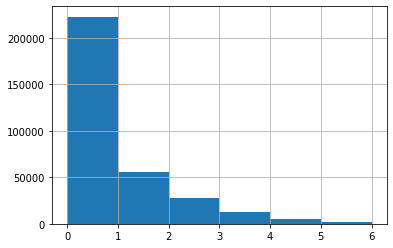

In [ ]:
def convert_float_score_into_int_score(input_Y):
    input_Y.loc[(input_Y['score'] > 0) & (input_Y['score'] <= 1), 'score'] = 1
    input_Y.loc[(input_Y['score'] > 1) & (input_Y['score'] <= 2), 'score'] = 2
    input_Y.loc[(input_Y['score'] > 2) & (input_Y['score'] <= 3), 'score'] = 3
    input_Y.loc[(input_Y['score'] > 3) & (input_Y['score'] <= 4), 'score'] = 4
    input_Y.loc[(input_Y['score'] > 4), 'score'] = 5
    input_Y['score'] = input_Y['score'].astype('int')
    return input_Y
 #converting float values into integer values for plotting the graph   
test_Y = convert_float_score_into_int_score(test_Y)
train_Y = convert_float_score_into_int_score(train_Y)
valid_Y = convert_float_score_into_int_score(valid_Y)
test_Y['score'].hist(bins=[0, 1, 2, 3, 4, 5, 6])

In [ ]:
# Drop score column
test_X = test_X.iloc[:, :20]
train_X = train_X.iloc[:, :20]
valid_X = valid_X.iloc[:, :20]
test_X

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78
1,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85
2,1001,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75
3,1001,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55
4,1001,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326335,56043,2020-12-01,1.24,83.55,2.58,-2.42,-7.58,-5.00,0.38,-6.79,7.17,-2.74,5.42,8.52,2.85,5.68,7.81,10.34,5.13,5.21
326336,56043,2020-12-08,0.00,83.70,2.05,1.32,-10.65,-4.67,8.08,-3.27,11.35,-1.57,3.05,3.85,2.36,1.49,4.73,6.30,3.85,2.45
326337,56043,2020-12-15,0.14,82.90,2.04,-5.19,-10.64,-7.91,0.29,-8.63,8.93,-6.81,2.88,3.90,1.68,2.21,4.39,6.50,2.83,3.66
326338,56043,2020-12-22,1.64,82.00,3.13,-0.05,-5.29,-2.67,6.87,-7.05,13.93,-0.82,8.83,13.78,6.64,7.14,11.90,17.31,9.05,8.25


In [ ]:
# Null check
print("test_X has any null?: " + str(test_X.isnull().values.any()))
print("train_X has any null?: " + str(train_X.isnull().values.any()))
print("valid_X has any null?: " + str(valid_X.isnull().values.any()))
print("soil_df has any null?: " + str(soil_df.isnull().values.any()))

test_X has any null?: False
train_X has any null?: False
valid_X has any null?: False
soil_df has any null?: False


In [ ]:
# Merge soil and X meteo
test_X = test_X.merge(soil_df, left_on='fips', right_on='fips')
train_X = train_X.merge(soil_df, left_on='fips', right_on='fips')
valid_X = valid_X.merge(soil_df, left_on='fips', right_on='fips')
test_X.head(10)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
2,1001,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
3,1001,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
4,1001,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
5,1001,2019-02-05,1.57,100.29,11.40,17.37,16.04,16.00,23.19,12.72,10.47,17.34,1.73,2.15,1.30,0.85,3.92,5.63,1.93,3.69,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
6,1001,2019-02-12,20.45,99.98,9.81,14.40,13.67,13.08,20.28,6.48,13.80,14.24,3.72,5.15,2.68,2.47,6.87,8.67,5.27,3.41,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
7,1001,2019-02-19,13.75,100.87,6.20,8.75,6.96,6.89,12.49,5.72,6.77,8.82,4.09,4.98,2.68,2.30,6.60,8.18,4.49,3.68,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
8,1001,2019-02-26,0.01,100.97,6.98,12.04,8.74,8.52,19.08,7.32,11.76,11.84,1.60,2.09,1.04,1.05,3.46,6.04,1.79,4.25,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
9,1001,2019-03-05,0.06,101.05,2.75,1.34,-4.25,-4.15,7.63,-3.55,11.19,1.55,3.03,4.45,2.07,2.37,5.43,7.02,4.09,2.94,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2


In [ ]:
train_X.head(10)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
2,1001,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
3,1001,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
4,1001,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
5,1001,2000-02-08,0.00,101.04,5.01,8.88,3.90,3.91,17.64,2.65,14.99,8.31,1.30,2.04,0.48,1.55,2.74,5.33,0.69,4.63,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
6,1001,2000-02-15,0.00,100.68,5.84,10.94,5.84,5.84,20.57,2.05,18.52,10.96,2.09,2.69,1.73,0.96,4.62,7.63,2.57,5.07,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
7,1001,2000-02-22,0.36,101.34,5.03,10.02,3.99,4.00,18.57,2.49,16.08,10.07,2.30,2.84,1.77,1.07,4.96,7.13,2.67,4.46,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
8,1001,2000-02-29,0.01,100.71,6.52,12.61,7.49,7.49,21.52,4.27,17.25,12.61,2.30,2.90,1.45,1.45,5.09,7.64,2.10,5.54,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
9,1001,2000-03-07,0.00,100.79,7.48,16.81,9.47,9.47,25.15,9.89,15.27,15.49,2.03,2.51,1.45,1.06,3.96,6.92,1.84,5.07,32.536382,-86.64449,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.017,0.0,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2


In [ ]:
# Standardize features by removing the mean and scaling to unit variance
scaler = MinMaxScaler()
train_X = pd.DataFrame(np.append(train_X.iloc[:, :2].values, scaler.fit_transform(train_X.iloc[:, 2:]), axis=1), columns=train_X.columns)
valid_X = pd.DataFrame(np.append(valid_X.iloc[:, :2].values, scaler.transform(valid_X.iloc[:, 2:]), axis=1), columns=valid_X.columns)
test_X = pd.DataFrame(np.append(test_X.iloc[:, :2].values, scaler.transform(test_X.iloc[:, 2:]), axis=1), columns=test_X.columns)
train_X.head(10)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,2000-01-04,0.094552,0.906896,0.285714,0.626454,0.666506,0.666774,0.618668,0.588131,0.525158,0.608614,0.182425,0.211005,0.142271,0.18039,0.283242,0.30786,0.210349,0.224837,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
1,1001,2000-01-11,0.007884,0.909847,0.295268,0.627524,0.694592,0.69469,0.628825,0.636811,0.433189,0.597564,0.07554,0.079024,0.071819,0.06338,0.138434,0.201237,0.096175,0.185185,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
2,1001,2000-01-18,0.00658,0.909579,0.427207,0.664973,0.781576,0.781646,0.618025,0.681389,0.296568,0.644776,0.120247,0.125362,0.114227,0.089924,0.213115,0.201965,0.215973,0.09281,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
3,1001,2000-01-25,0.0,0.902066,0.086897,0.463555,0.441502,0.445051,0.45873,0.483933,0.364878,0.45894,0.157246,0.166322,0.155951,0.111593,0.238616,0.261281,0.222722,0.159041,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
4,1001,2000-02-01,0.0,0.925946,0.146497,0.501538,0.541005,0.541633,0.527771,0.501026,0.502166,0.490206,0.089414,0.089781,0.060192,0.086674,0.167122,0.201237,0.071429,0.204357,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
5,1001,2000-02-08,0.0,0.927019,0.221565,0.592751,0.631359,0.631638,0.612882,0.594831,0.494169,0.570944,0.051901,0.060819,0.032832,0.069881,0.101548,0.163028,0.038808,0.183442,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
6,1001,2000-02-15,0.0,0.91736,0.259327,0.620302,0.662494,0.662602,0.650553,0.586627,0.611796,0.604219,0.092497,0.087712,0.118331,0.03792,0.187158,0.246725,0.144544,0.202614,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
7,1001,2000-02-22,0.002134,0.935068,0.222475,0.607998,0.632804,0.633082,0.624839,0.592643,0.53049,0.593044,0.103289,0.093918,0.121067,0.043879,0.202641,0.22853,0.150169,0.176035,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
8,1001,2000-02-29,0.000059,0.918165,0.290264,0.642637,0.688974,0.689074,0.662767,0.616983,0.5694

In [ ]:
test_X.head(10)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,2019-01-01,0.013338,0.912798,0.434486,0.670724,0.78623,0.785817,0.60954,0.707917,0.20993,0.650301,0.046763,0.038477,0.054036,0.024377,0.101548,0.114993,0.069179,0.102832,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
1,1001,2019-01-08,0.000296,0.914408,0.39172,0.64986,0.761515,0.76111,0.643739,0.686586,0.35055,0.630462,0.10483,0.117087,0.114911,0.07909,0.210383,0.205968,0.206412,0.105882,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
2,1001,2019-01-15,0.0,0.927824,0.177434,0.526281,0.583855,0.584309,0.506943,0.572542,0.273909,0.515696,0.073998,0.075714,0.093023,0.042254,0.126138,0.11936,0.134421,0.057952,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
3,1001,2019-01-22,0.000178,0.929702,0.21929,0.554634,0.629915,0.618322,0.545899,0.536305,0.463179,0.542943,0.174203,0.165494,0.170315,0.09805,0.279599,0.280568,0.281777,0.136383,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
4,1001,2019-01-29,0.034323,0.908774,0.16151,0.503812,0.562189,0.552382,0.480329,0.487625,0.411863,0.493973,0.144399,0.163426,0.116963,0.138137,0.232696,0.222344,0.202475,0.127669,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
5,1001,2019-02-05,0.009307,0.906896,0.512284,0.706299,0.826192,0.825606,0.684238,0.732531,0.343552,0.684329,0.073998,0.06537,0.088919,0.031961,0.155282,0.173945,0.108549,0.142484,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
6,1001,2019-02-12,0.121228,0.898578,0.439945,0.666578,0.788156,0.778758,0.646824,0.647204,0.454515,0.645404,0.176259,0.189491,0.183311,0.119718,0.289617,0.284571,0.2964,0.130283,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
7,1001,2019-02-19,0.08151,0.922458,0.275705,0.591012,0.680469,0.679448,0.54667,0.636811,0.22026,0.577348,0.195272,0.182458,0.183311,0.110509,0.277322,0.266739,0.252531,0.142048,0.298402,0.663702,0.017967,0.043018,0.36689,0.428182,0.436768,0.346061,0.028016,0.0,0.0,0.215928,0.251726,0.391823,0.288538,0.3207,0.009974,0.279453,0.002889,0.027503,0.117686,0.580168,0.010152,0.57333,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.285714
8,1001,2019-02-26,0.000059,0.925141,0.311192,0.635014,0.709035,0.705599,0.631396,0.6586

# **Setting up the libraries**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
# Matplotlib forms basis for visualisation in Python
import matplotlib.pyplot as plt
# Set the default style for plots

colors = plt.rcParams["axes.prop_cycle"]()
#Gradient colours
from matplotlib.colors import LinearSegmentedColormap
nodes = [0,0.5,1.0]
color = ['#00ACF0','#ffffff']
cmap = LinearSegmentedColormap.from_list("", list(zip(nodes, color)))
%config InlineBackend.figure_format='retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import stats

from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Core Magellan libraries, for string similarity
!pip3 install py_stringsimjoin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for py_stringsimjoin: filename=py_stringsimjoin-0.3.2-cp37-cp37m-linux_x86_64.whl size=3724078 sha256=5eab2a560a17733f7613f990960d3b10a1263f03f1b2a19c1b9c6e137de0664f
  Stored in directory: /root/.cache/pip/wheels/7c/0d/a4/c0a779a4d196bed8ed41ca12be09a93e158e4fc974b59f9fd5
  Created wheel for py_stringmatching: filename=py_stringmatching-0.4.2-cp37-cp37m-linux_x86_64.whl size=2055561 sha256=523e36c1ad3ce2f513a838726bd843d15781417ad0632a1681f95756c29ded5a
  Stored in directory: /root/.cache/pip/wheels/7e/12/86/46f9378ae730550dd2f89cad50880e70d66cabedd90074f2d2
Successfully built py_stringsimjoin py_stringmatching


In [ ]:
import pandas as pd

# Approximate string matching
import py_stringsimjoin as ssj
import py_stringmatching as sm

In [ ]:
import pandas as pd
input_fn = pd.read_csv('drought_train.csv')

In [ ]:
input_fn = spark.read.csv('drought_train.csv', header=True)

In [ ]:
input_fn

DataFrame[fips: string, date: string, PRECTOT: string, PS: string, QV2M: string, T2M: string, T2MDEW: string, T2MWET: string, T2M_MAX: string, T2M_MIN: string, T2M_RANGE: string, TS: string, WS10M: string, WS10M_MAX: string, WS10M_MIN: string, WS10M_RANGE: string, WS50M: string, WS50M_MAX: string, WS50M_MIN: string, WS50M_RANGE: string, score: string]

In [ ]:
input_fn.show(10)

+----+----------+-------+------+-----+-----+------+------+-------+-------+---------+-----+-----+---------+---------+-----------+-----+---------+---------+-----------+-----+
|fips|      date|PRECTOT|    PS| QV2M|  T2M|T2MDEW|T2MWET|T2M_MAX|T2M_MIN|T2M_RANGE|   TS|WS10M|WS10M_MAX|WS10M_MIN|WS10M_RANGE|WS50M|WS50M_MAX|WS50M_MIN|WS50M_RANGE|score|
+----+----------+-------+------+-----+-----+------+------+-------+-------+---------+-----+-----+---------+---------+-----------+-----+---------+---------+-----------+-----+
|1001|2017-01-01|   32.5|100.02|10.47|14.69| 14.47| 14.47|  17.68|  10.53|     7.15|14.63| 2.14|     2.71|     1.52|       1.19|  4.4|     5.96|     2.25|       3.71| null|
|1001|2017-01-02|  63.52|100.04|12.75|17.96| 17.75| 17.75|   20.3|  16.14|     4.16|17.85| 2.75|     4.31|      1.6|       2.71|  5.5|     8.16|     4.05|       4.11| null|
|1001|2017-01-03|  18.82| 99.69| 9.74|14.24| 13.44| 13.44|  18.48|   9.29|      9.2|14.06| 2.25|     3.73|     1.64|       2.09|  4.8| 

In [ ]:
input_fn.count()

2268840

# **Reading the data in SQL**
Query with Structure This is a language for communicating with RDBMSs, and it was designed to conduct C.R.U.D operations as well as construct tables and hierarchies.

Required libraries are installed here.
Pandas is a software library written for the python programming language for our data manipulation and analysis.Where as numpy is used for supporting large multi dimensional arrays and matrices,and matplot is used  for plotting graphs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
import sqlite3

In [ ]:
data = pd.read_csv('drought_train.csv')

In [ ]:
data.head(10)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2017-01-01,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,7.15,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,1001,2017-01-02,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,4.16,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,1001,2017-01-04,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,9.62,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,1001,2017-01-05,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,13.24,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN
5,1001,2017-01-06,19.85,100.34,3.31,0.35,-2.02,-2.00,4.74,-4.25,8.99,0.42,3.31,3.98,2.15,1.83,5.29,6.03,3.82,2.21,NaN
6,1001,2017-01-07,0.06,101.59,1.80,-6.49,-9.40,-9.28,-1.02,-11.57,10.55,-7.05,3.64,4.47,2.84,1.63,6.51,7.68,4.75,2.94,NaN
7,1001,2017-01-08,0.00,102.36,1.87,-6.38,-9.11,-9.02,0.68,-12.89,13.57,-8.36,2.18,2.81,1.16,1.65,3.69,4.66,1.93,2.73,NaN
8,1001,2017-01-09,0.00,101.98,2.67,-2.14,-4.85,-4.81,5.20,-9.54,14.74,-3.05,2.39,2.74,1.70,1.04,4.61,7.01,2.77,4.23,NaN
9,1001,2017-01-10,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0


In [ ]:
data.isnull()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268835,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2268836,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2268837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2268838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
data=data.dropna()

In [ ]:
data.isnull()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2268812,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2268819,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2268826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
import numpy as np

In [ ]:
data.count()

fips           323232
date           323232
PRECTOT        323232
PS             323232
QV2M           323232
T2M            323232
T2MDEW         323232
T2MWET         323232
T2M_MAX        323232
T2M_MIN        323232
T2M_RANGE      323232
TS             323232
WS10M          323232
WS10M_MAX      323232
WS10M_MIN      323232
WS10M_RANGE    323232
WS50M          323232
WS50M_MAX      323232
WS50M_MIN      323232
WS50M_RANGE    323232
score          323232
dtype: int64

We can't identify duplicate data here since various place may have the same values.

In [ ]:
data.shape

(323232, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323232 entries, 2 to 2268833
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fips         323232 non-null  int64  
 1   date         323232 non-null  object 
 2   PRECTOT      323232 non-null  float64
 3   PS           323232 non-null  float64
 4   QV2M         323232 non-null  float64
 5   T2M          323232 non-null  float64
 6   T2MDEW       323232 non-null  float64
 7   T2MWET       323232 non-null  float64
 8   T2M_MAX      323232 non-null  float64
 9   T2M_MIN      323232 non-null  float64
 10  T2M_RANGE    323232 non-null  float64
 11  TS           323232 non-null  float64
 12  WS10M        323232 non-null  float64
 13  WS10M_MAX    323232 non-null  float64
 14  WS10M_MIN    323232 non-null  float64
 15  WS10M_RANGE  323232 non-null  float64
 16  WS50M        323232 non-null  float64
 17  WS50M_MAX    323232 non-null  float64
 18  WS50M_MIN    323232 non

#**PCA**

In [ ]:
# Remove the date and the fip labels for the training data
X = data.drop(['date','fips'], axis=1)

# Labels
y = data['score']

# Let's see the data
X

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0000
9,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0000
16,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,2.24,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2.0000
23,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,1.82,2.34,1.03,1.31,3.52,6.49,1.47,5.02,1.0000
30,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,2.31,3.00,1.76,1.24,5.00,7.40,2.88,4.52,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268805,0.21,82.62,2.88,-0.63,-6.30,-6.25,5.40,-5.43,10.83,-1.94,3.80,5.44,2.93,2.51,6.21,9.43,4.63,4.80,0.2572
2268812,0.01,83.32,1.47,-7.66,-14.71,-13.42,-1.41,-11.86,10.45,-8.96,3.26,5.23,2.20,3.03,4.82,6.46,3.79,2.67,0.2572
2268819,0.06,82.94,2.12,-3.04,-10.21,-9.60,2.45,-6.68,9.13,-4.08,3.59,5.09,2.07,3.01,5.69,8.44,3.42,5.01,0.2572
2268826,0.06,82.77,3.09,0.69,-5.36,-5.17,5.77,-4.12,9.89,-1.31,3.64,4.69,2.04,2.65,5.79,7.52,3.47,4.05,0.2572


Best practice for PCA is to scale the data...

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features based on unit variance
X = StandardScaler().fit_transform(X)

X

array([[ 2.41307076,  0.55395492,  0.28501524, ..., -0.26581487,
         0.0366257 ,  1.5941789 ],
       [-0.44141487,  0.81936138, -0.54984314, ...,  0.74336618,
        -0.81848337,  1.5941789 ],
       [-0.42319474,  0.72167706,  0.62341658, ..., -0.16206729,
        -0.68515991,  1.5941789 ],
       ...,
       [-0.43534149, -2.53323834, -1.25906749, ...,  0.14917547,
         0.16994916, -0.3069692 ],
       [-0.43534149, -2.56457105, -1.06251103, ...,  0.17275446,
        -0.27139746, -0.3069692 ],
       [-0.19544323, -2.57562965, -1.12127533, ..., -1.29857492,
         0.48716704, -0.3069692 ]])

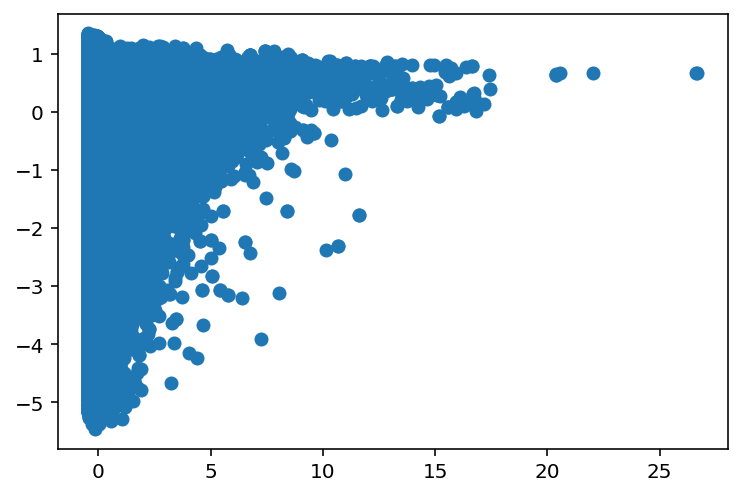

In [ ]:
# Re-plotting now with the mean at the center!
plt.scatter(X[:,0], X[:,1])

##  Running PCA

We start by creating an instance of the PCA class, and fit it to the data...

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X2 = pca.fit_transform(X)

In [ ]:
# Let's see the components
pca.components_

array([[-3.45222784e-02, -8.63839261e-02, -2.91413382e-01,
        -2.93646258e-01, -2.97744263e-01, -2.98436988e-01,
        -2.84283195e-01, -2.96590872e-01, -2.14582771e-02,
        -2.89872844e-01,  2.50235382e-01,  2.54217721e-01,
         1.86789205e-01,  2.15144954e-01,  2.42948601e-01,
         2.50549577e-01,  1.75513358e-01,  1.63900451e-01,
         3.63413540e-02],
       [ 1.09895194e-01,  7.75471417e-02,  2.16861649e-01,
         2.35969418e-01,  2.28471131e-01,  2.27828644e-01,
         2.22700934e-01,  2.34139711e-01,  1.18909711e-02,
         2.40373364e-01,  3.14991903e-01,  3.05877134e-01,
         2.80579864e-01,  2.20082063e-01,  3.19570289e-01,
         3.04692833e-01,  2.84464550e-01,  1.30079592e-01,
         3.25138916e-03],
       [-1.21198014e-01, -3.11310469e-01, -6.64314858e-02,
         1.10366543e-01, -4.80978130e-02, -4.98482238e-02,
         1.80626333e-01,  3.27484442e-02,  4.39965809e-01,
         1.11924673e-01, -4.81072208e-02,  8.37934837e-02,
    

In [ ]:
X[:,0:2]

array([[ 2.41307076,  0.55395492],
       [-0.44141487,  0.81936138],
       [-0.42319474,  0.72167706],
       ...,
       [-0.43534149, -2.53323834],
       [-0.43534149, -2.56457105],
       [-0.19544323, -2.57562965]])

1.   SVD is the decomposition of a matrix A into 3 matrices – U, S, and V
2.   S is the diagonal matrix of singular values. Think of singular values as the importance values of different features in the matrix.
3. The rank of a matrix is a measure of the unique information stored in a matrix. Higher the rank, more the information.
4. Eigenvectors of a matrix are directions of maximum spread or variance of data
The basic principle of Dimensionality Reduction,  You want to reduce a high-rank matrix to a low-rank matrix while preserving important information.

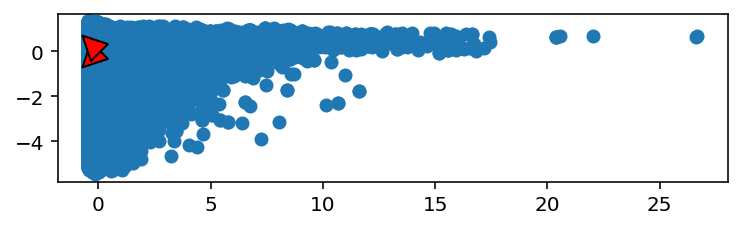

In [ ]:
# Visualization code based on 
# https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib
import numpy as np

# Let's take our first two dimensions, as before
data = X[:, 0:2]

mu = data.mean(axis=0)
data = (data - mu)/data.std(axis=0)
# The property T is an accessor to the method transpose() .
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

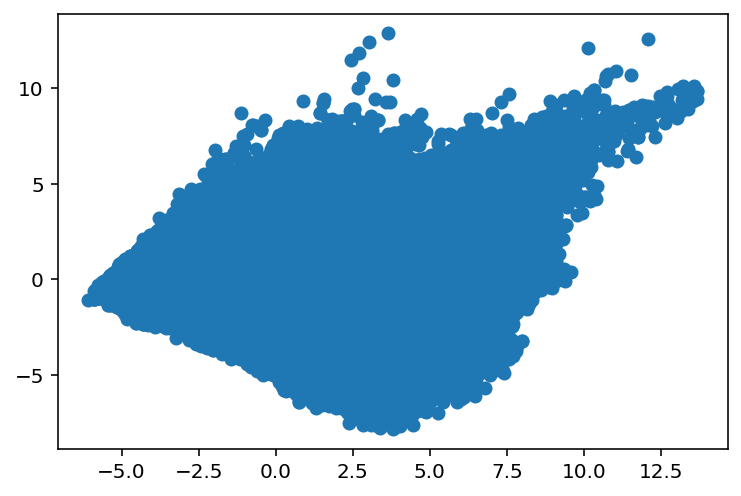

In [ ]:
# Here is the transformed data along the first 2 components
plt.scatter(X2[:,0], X2[:,1])

 How Many Components? Principal Components vs Explained Variance

How much does each component explain the variance?  We can look at the `explained_variance_ratio_` to tell...

In [ ]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_

array([0.42569787, 0.2429815 , 0.10700835, 0.07573227, 0.05326053,
       0.04036336, 0.03100075, 0.00835026, 0.00663018])

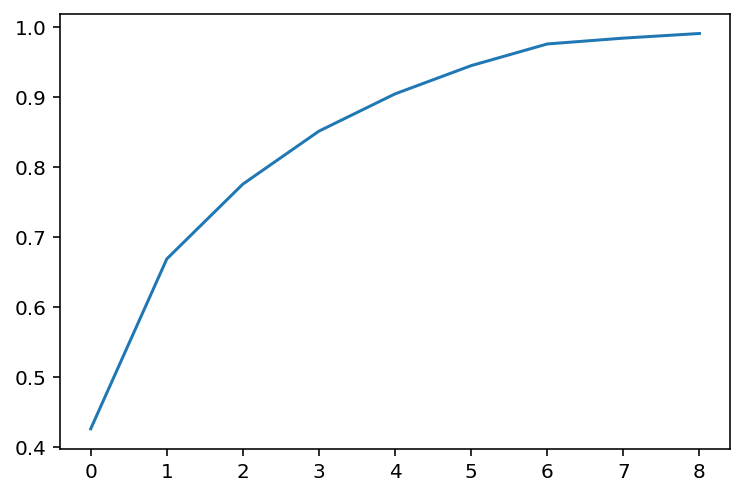

In [ ]:
# See how much is contributed by the first few terms
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

## Learning over PCA-Reduced Data

From the above, we saw how to do PCA on the overall dataset.  But let's do it more methodically as part of machine learning.  We'll start with separate training and test data.


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.20, random_state=42)

# Fit the PCA on the training data
pca = PCA(n_components=6)
pca.fit(X_train)
# and transform it
X_train_2 = pca.transform(X_train)

# Then train a simple linear regression classifier
# (tries to find the best weighted linear combination to
# match the output)
regr = linear_model.LinearRegression()
regr.fit(X_train_2, y_train)

X_train_2

array([[ 6.39727837, -1.95542477,  2.11485238,  1.37863682, -0.77889981,
        -1.00088989],
       [ 2.31868138,  0.30006896, -0.72181194, -0.87977018, -0.82946739,
         0.11694725],
       [ 5.95324947,  3.3575704 , -2.12187848,  0.03796374, -0.37306973,
         0.19422831],
       ...,
       [ 3.20301852,  0.93280753, -0.60060749, -0.71010951, -0.8740284 ,
         0.1359147 ],
       [-3.10646834, -0.07053234,  1.24660208,  0.68900698, -1.19447287,
        -0.26741025],
       [-1.40711082, -0.37543787, -0.6240213 , -0.07793213, -0.85534416,
        -0.3303834 ]])

In [ ]:
X_test_2 = pca.transform(X_test)

regr.predict(X_test_2)

regr.score(X_test_2, y_test)

0.9879147784065146

**Recurrent Neural Networks**

Recurrent Neural Network (RNN) adds prior outputs as inputs while preserving hidden states to capture sequential dependency. RNNs can be used to deal with sequential data, such as natural language or time series. However, It is plagued by the problem of vanishing gradients. RNN variants, such as Long Short-Term Memory (LSTM)  and Gated Recurrent Unit (GRU) are designed to solve this problem.

#**LSTM** Baseline


Installing the deep learning supporting libraries

In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
!pip install git+https://github.com/hyperopt/hyperopt.git

  Cloning https://github.com/hyperopt/hyperopt.git to /tmp/pip-req-build-da_wc_0j
  Running command git clone -q https://github.com/hyperopt/hyperopt.git /tmp/pip-req-build-da_wc_0j
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 198 kB 4.1 MB/s 
  Created wheel for hyperopt: filename=hyperopt-0.2.7-py2.py3-none-any.whl size=966138 sha256=30c6c692587e80dc6ee5aff79addb42c963a313d70a8814df9ea02feb5640b80
  Stored in directory: /tmp/pip-ephem-wheel-cache-jgl7lkng/wheels/76/c2/29/45e850aafb93f1eeb7c77257ff4a5b2c09095ef1f2050d1490
Successfully built hyperopt
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.1.2
    Uninstalling hyperopt-0.1.2:
      Successfully uninstalled hyperopt-0.1.2


In [ ]:
 !pip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
 !pip install fastai==1.0.61

ERROR: torch-1.0.0-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


In [ ]:
!pip install tsai

     |████████████████████████████████| 213 kB 4.5 MB/s 
     |████████████████████████████████| 97 kB 3.4 MB/s 
     |████████████████████████████████| 6.2 MB 33.9 MB/s 
     |████████████████████████████████| 2.5 MB 34.1 MB/s 
     |████████████████████████████████| 189 kB 37.0 MB/s 
     |████████████████████████████████| 3.3 MB 32.7 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 26.3 MB 5.7 MB/s 
     |████████████████████████████████| 9.8 MB 15.7 MB/s 
     |████████████████████████████████| 14.9 MB 27.1 MB/s 
     |████████████████████████████████| 1.1 MB 35.3 MB/s 
     |████████████████████████████████| 119 kB 34.0 MB/s 
     |████████████████████████████████| 837 kB 40.8 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 133 kB 39.8 MB/s 
     |████████████████████████████████| 830 kB 38.2 MB/s 
     |████████████████████████████████| 822 kB 40.0 MB/s 
     |██████████████

#Using data retrieval from drive for easiness in splitting the data using os library

In [ ]:
import json
import shutil
import os
import math

In [ ]:
#mount google drive to access the stored data set and manipulate it
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#path configuration
parent_dir = '/content/gdrive/My Drive/Predict Droughts using Weather'
#get category folder list
os.chdir(parent_dir)
category_list = list(filter(lambda x: os.path.isdir(x), os.listdir()))
for category in category_list:
  print(category)

validation_timeseries
train_timeseries
test_timeseries
train
valid
test


In [ ]:
#create training,validation,testing directories
data_set_dirs= ['train','valid','test']
for dsdirs in data_set_dirs:
  path = parent_dir + '/'+ dsdirs
  os.mkdir( path,755 )

In [ ]:
import numpy as np
import pandas as pd
import json
import os
from os import walk
from tqdm.auto import tqdm
from datetime import datetime
from scipy.interpolate import interp1d
from sklearn.preprocessing import RobustScaler

files = {}

for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Predict Droughts using Weather'):
    for filename in filenames:
        if 'train' in filename:
            files['train'] = os.path.join(dirname, filename)
        if 'valid' in filename:
            files['valid'] = os.path.join(dirname, filename)
        if 'test' in filename:
            files['test'] = os.path.join(dirname, filename)

In [ ]:
#to know the current path
print(os.getcwd())

/content/gdrive/MyDrive/Predict Droughts using Weather


Classsifying each value of score as a different type of drought.

In [ ]:
class2id = {
    'None': 0,
    'D0': 1,
    'D1': 2,
    'D2': 3,
    'D3': 4,
    'D4': 5,
}
id2class = {v: k for k, v in class2id.items()}

Indexing all csv file with fips and date column.

In [ ]:
dfs = {
    k: pd.read_csv(files[k]).set_index(['fips', 'date'])
    for k in files.keys()
}

 Adds a helper function to interpolate the drought values.

In [ ]:
def interpolate_nans(padata, pkind='linear'):
    """
    see: https://stackoverflow.com/a/53050216/2167159
    """
    aindexes = np.arange(padata.shape[0])
    agood_indexes, = np.where(np.isfinite(padata))
    f = interp1d(agood_indexes
               , padata[agood_indexes]
               , bounds_error=False
               , copy=False
               , fill_value="extrapolate"
               , kind=pkind)
    return f(aindexes)

Defines function to store each csv file in the form of numpy arrays with train, test, and validation data seperated.

In [ ]:
def date_encode(date):
    if isinstance(date, str):
        date = datetime.strptime(date, "%Y-%m-%d")
    return (
        np.sin(2 * np.pi * date.timetuple().tm_yday / 366),
        np.cos(2 * np.pi * date.timetuple().tm_yday / 366),
    )

def loadXY(
    df,
    random_state=42, # keep this at 42
    window_size=180, # how many days in the past (default/competition: 180)
    target_size=6, # how many weeks into the future (default/competition: 6)
    fuse_past=True, # add the past drought observations? (default: True)
    return_fips=False, # return the county identifier (do not use for predictions)
    encode_season=True, # encode the season using the function above (default: True) 
    use_prev_year=False, # add observations from 1 year prior?
):
    df = dfs[df]
    soil_df = pd.read_csv("/content/gdrive/My Drive/Predict Droughts using Weather/soil_data.csv")
    time_data_cols = sorted(
        [c for c in df.columns if c not in ["fips", "date", "score"]]
    )
    static_data_cols = sorted(
        [c for c in soil_df.columns if c not in ["soil", "lat", "lon"]]
    )
    count = 0
    score_df = df.dropna(subset=["score"])
    X_static = np.empty((len(df) // window_size, len(static_data_cols)))
    X_fips_date = []
    add_dim = 0
    if use_prev_year:
        add_dim += len(time_data_cols)
    if fuse_past:
        add_dim += 1
        if use_prev_year:
            add_dim += 1
    if encode_season:
        add_dim += 2
    X_time = np.empty(
        (len(df) // window_size, window_size, len(time_data_cols) + add_dim)
    )
    y_past = np.empty((len(df) // window_size, window_size))
    y_target = np.empty((len(df) // window_size, target_size))
    if random_state is not None:
        np.random.seed(random_state)
    for fips in tqdm(score_df.index.get_level_values(0).unique()):
        if random_state is not None:
            start_i = np.random.randint(1, window_size)
        else:
            start_i = 1
        fips_df = df[(df.index.get_level_values(0) == fips)]
        X = fips_df[time_data_cols].values
        y = fips_df["score"].values
        X_s = soil_df[soil_df["fips"] == fips][static_data_cols].values[0]
        for i in range(start_i, len(y) - (window_size + target_size * 7), window_size):
            X_fips_date.append((fips, fips_df.index[i : i + window_size][-1]))
            X_time[count, :, : len(time_data_cols)] = X[i : i + window_size]
            if use_prev_year:
                if i < 365 or len(X[i - 365 : i + window_size - 365]) < window_size:
                    continue
                X_time[count, :, -len(time_data_cols) :] = X[
                    i - 365 : i + window_size - 365
                ]
            if not fuse_past:
                y_past[count] = interpolate_nans(y[i : i + window_size])
            else:
                X_time[count, :, len(time_data_cols)] = interpolate_nans(
                    y[i : i + window_size]
                )
            if encode_season:
                enc_dates = [
                    date_encode(d) for f, d in fips_df.index[i : i + window_size].values
                ]
                d_sin, d_cos = [s for s, c in enc_dates], [c for s, c in enc_dates]
                X_time[count, :, len(time_data_cols) + (add_dim - 2)] = d_sin
                X_time[count, :, len(time_data_cols) + (add_dim - 2) + 1] = d_cos
            temp_y = y[i + window_size : i + window_size + target_size * 7]
            y_target[count] = np.array(temp_y[~np.isnan(temp_y)][:target_size])
            X_static[count] = X_s
            count += 1
    print(f"loaded {count} samples")
    results = [X_static[:count], X_time[:count], y_target[:count]]
    if not fuse_past:
        results.append(y_past[:count])
    if return_fips:
        results.append(X_fips_date)
    return results

Normalizes the splitted data  by definning normalize function.

In [ ]:
scaler_dict = {}
scaler_dict_static = {}
scaler_dict_past = {}


def normalize(X_static, X_time, y_past=None, fit=False):
    for index in tqdm(range(X_time.shape[-1])):
        if fit:
            scaler_dict[index] = RobustScaler().fit(X_time[:, :, index].reshape(-1, 1))
        X_time[:, :, index] = (
            scaler_dict[index]
            .transform(X_time[:, :, index].reshape(-1, 1))
            .reshape(-1, X_time.shape[-2])
        )
    for index in tqdm(range(X_static.shape[-1])):
        if fit:
            scaler_dict_static[index] = RobustScaler().fit(
                X_static[:, index].reshape(-1, 1)
            )
        X_static[:, index] = (
            scaler_dict_static[index]
            .transform(X_static[:, index].reshape(-1, 1))
            .reshape(1, -1)
        )
    index = 0
    if y_past is not None:
        if fit:
            scaler_dict_past[index] = RobustScaler().fit(y_past.reshape(-1, 1))
        y_past[:, :] = (
            scaler_dict_past[index]
            .transform(y_past.reshape(-1, 1))
            .reshape(-1, y_past.shape[-1])
        )
        return X_static, X_time, y_past
    return X_static, X_time

Preparing the dataset for training

In [ ]:
X_static_train, X_time_train, y_target_train = loadXY('train')
print("train shape", X_time_train.shape)
X_static_valid, X_time_valid, y_target_valid, valid_fips = loadXY("valid", return_fips=True)
print("validation shape", X_time_valid.shape)
X_static_train, X_time_train = normalize(X_static_train, X_time_train, fit=True)
X_static_valid, X_time_valid = normalize(X_static_valid, X_time_valid)

  0%|          | 0/3108 [00:00<?, ?it/s]

loaded 103390 samples
train shape (103390, 180, 21)


  0%|          | 0/3108 [00:00<?, ?it/s]

loaded 8748 samples
validation shape (8748, 180, 21)


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Installing torch studio library



In [ ]:
!pip3 install torch torchvision torchaudio

Uses PyTorch to load the data.

In [ ]:
batch_size = 128
output_weeks = 6
use_static = True
hidden_dim = 512
n_layers = 2
ffnn_layers = 2
dropout = 0.1
one_cycle = True
lr = 7e-5
epochs = 10
clip = 5

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(
    torch.tensor(X_time_train),
    torch.tensor(X_static_train),
    torch.tensor(y_target_train[:, :output_weeks]),
)
train_loader = DataLoader(
    train_data, shuffle=True, batch_size=batch_size, drop_last=False
)
valid_data = TensorDataset(
    torch.tensor(X_time_valid),
    torch.tensor(X_static_valid),
    torch.tensor(y_target_valid[:, :output_weeks]),
)
valid_loader = DataLoader(
    valid_data, shuffle=False, batch_size=batch_size, drop_last=False
)

In [ ]:
import torch
from torch import nn
from sklearn.metrics import f1_score, mean_absolute_error

class DroughtNetLSTM(nn.Module):
    def __init__(
        self,
        output_size,
        num_input_features,
        hidden_dim,
        n_layers,
        ffnn_layers,
        drop_prob,
        static_dim=0,
    ):
        super(DroughtNetLSTM, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.lstm = nn.LSTM(
            num_input_features,
            hidden_dim,
            n_layers,
            dropout=drop_prob,
            batch_first=True,
        )
        self.dropout = nn.Dropout(drop_prob)
        self.fflayers = []
        for i in range(ffnn_layers - 1):
            if i == 0:
                self.fflayers.append(nn.Linear(hidden_dim + static_dim, hidden_dim))
            else:
                self.fflayers.append(nn.Linear(hidden_dim, hidden_dim))
        self.fflayers = nn.ModuleList(self.fflayers)
        self.final = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden, static=None):
        batch_size = x.size(0)
        x = x.to(dtype=torch.float32)
        if static is not None:
            static = static.to(dtype=torch.float32)
        lstm_out, hidden = self.lstm(x, hidden)
        lstm_out = lstm_out[:, -1, :]

        out = self.dropout(lstm_out)
        for i in range(len(self.fflayers)):
            if i == 0 and static is not None:
                out = self.fflayers[i](torch.cat((out, static), 1))
            else:
                out = self.fflayers[i](out)
        out = self.final(out)

        out = out.view(batch_size, -1)
        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden

We need to exchange two axes：
* **number of samples**
* **number of features** (aka variables, dimensions, channels)
* **number of steps** (or length, time steps, sequence steps)

We already have the split:

# 1. Model and Hyperparameter Tuning

In [ ]:
import hyperopt
print(hyperopt.__version__)

0.2


In [ ]:
from hyperopt import Trials, STATUS_OK, STATUS_FAIL, tpe, fmin, hp

In [ ]:
search_space

{'batch_size': <hyperopt.pyll.base.Apply at 0x230fc49ea88>,
 'time_steps': <hyperopt.pyll.base.Apply at 0x230fc4a0108>,
 'lr': <hyperopt.pyll.base.Apply at 0x230fc4a0848>,
 'epochs': <hyperopt.pyll.base.Apply at 0x230fc4a0e48>,
 'patience': <hyperopt.pyll.base.Apply at 0x230fc491408>,
 'optimizer': <hyperopt.pyll.base.Apply at 0x230fc350348>,
 'n_layers': <hyperopt.pyll.base.Apply at 0x230fc4951c8>,
 'hidden_size': <hyperopt.pyll.base.Apply at 0x230fc495748>,
 'bidirectional': <hyperopt.pyll.base.Apply at 0x230fc495cc8>}

In [ ]:
X.shape

(138745, 18, 90)

In [ ]:
time_steps = 30

In [ ]:
X[:, :, -time_steps:].shape

(138745, 18, 30)

In [ ]:
X_test[:, :, -time_steps:].shape

(102430, 18, 30)

In [ ]:
X, y, splits = combine_split_data([X_train, X_valid], [y_train, y_valid])

In [ ]:
import time
from fastai.callback.tracker import EarlyStoppingCallback

In [ ]:
import gc

In [ ]:
# clear memory 
gc.collect()

186

In [ ]:
def create_model_hypopt(params):
    
    try:
        # clear memory 
        gc.collect()
        print("Trying params:",params)
        batch_size = params["batch_size"]
        time_steps = params["time_steps"]
    
        # Create data loader
        tfms  = [None, [Categorize()]]
        dsets = TSDatasets(X[:, :, -time_steps:], y, tfms=tfms, splits=splits, inplace=True)
        # set num_workers for memory bottleneck
        dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[batch_size, batch_size], num_workers=0)
    
        # Create model
        arch = LSTM
        k = {
            'n_layers': params['n_layers'],
            'hidden_size': params['hidden_size'],
            'bidirectional': params['bidirectional']
        }
        model = create_model(arch, dls=dls, **k)
        print(model.__class__.__name__)
    
        # Training the model
        learn = Learner(dls, model, metrics=accuracy, opt_func=params['optimizer'])
        start = time.time()
        learn.fit_one_cycle(params['epochs'], lr_max=params['lr'],
                            cbs=EarlyStoppingCallback(monitor='valid_loss', min_delta=0.0, patience=params['patience']))
        learn.plot_metrics()
        elapsed = time.time() - start
    
        vals = learn.recorder.values[-1]
        # vals[0], vals[1], vals[2]
        # train loss, valid loss, accuracy
        val_loss = vals[1]
    
        # delete tmp variables
        del dls
        del model
        del learn
        return {'loss': val_loss, 'status': STATUS_OK} # if accuracy use '-' sign, model is optional
    except:
        return {'loss': None, 'status': STATUS_FAIL}

Visulaization of results with respect to accuracy measures

Search the parameters: finding out which parameter best fits the model

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 100, 'hidden_size': 50, 'lr': 0.01, 'n_layers': 3, 'optimizer': <function SGD at 0x000002305F0AA0D8>, 'patience': 5, 'time_steps': 30}
LSTM                                                                                                                   
  0%|                                                                           | 0/30 [00:31<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,accuracy,time
0,1.702858,1.692864,0.664543,00:05
1,1.629233,1.616314,0.664543,00:05
2,1.548305,1.527683,0.664543,00:05
3,1.452379,1.427168,0.664543,00:05
4,1.351319,1.324173,0.664543,00:05
5,1.263916,1.236151,0.664543,00:05
6,1.217950,1.178302,0.664543,00:05
7,1.179652,1.148842,0.664543,00:05
8,1.161673,1.135475,0.664543,00:05
9,1.150240,1.129162,0.664543,00:05


No improvement since epoch 60: early stopping                                                                          
  0%|                                                                           | 0/30 [06:42<?, ?trial/s, best loss=?]

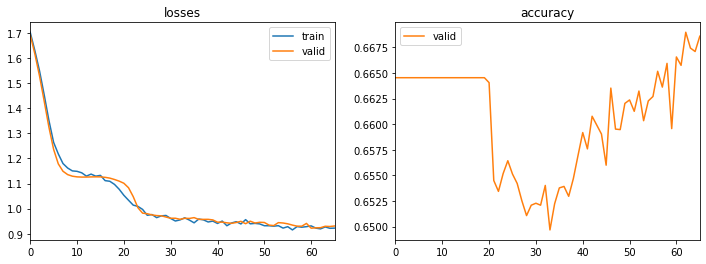

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 10, 'hidden_size': 200, 'lr': 0.0001, 'n_layers': 1, 'optimizer': <function SGD at 0x000002305F0AA0D8>, 'patience': 5, 'time_steps': 90}
LSTM                                                                                                                   
  3%|█▌                                            | 1/30 [07:11<3:14:29, 402.40s/trial, best loss: 0.9306774735450745]

epoch,train_loss,valid_loss,accuracy,time
0,1.778875,1.775118,0.259737,00:09
1,1.768611,1.763717,0.470971,00:09
2,1.752660,1.746966,0.638869,00:09
3,1.736507,1.731013,0.660296,00:09
4,1.722745,1.717331,0.663192,00:09
5,1.712743,1.706742,0.663578,00:09
6,1.705441,1.699555,0.663964,00:09
7,1.701793,1.695545,0.664205,00:09
8,1.699983,1.693981,0.664254,00:09
9,1.698117,1.693751,0.664254,00:09


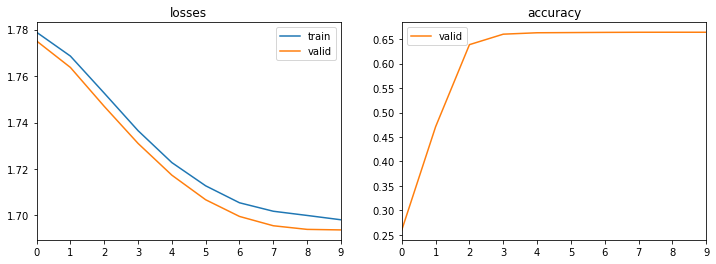

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': False, 'epochs': 10, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x000002305F0AA1F8>, 'patience': 5, 'time_steps': 90}
LSTM                                                                                                                   
  7%|███                                           | 2/30 [09:16<2:28:52, 319.00s/trial, best loss: 0.9306774735450745]

epoch,train_loss,valid_loss,accuracy,time
0,1.849807,1.839363,0.048598,00:02
1,1.497405,1.160657,0.664543,00:02
2,1.110778,1.016510,0.663288,00:02
3,0.987757,0.945197,0.663240,00:02
4,0.949288,0.939263,0.662613,00:02
5,0.926115,0.901211,0.662854,00:02
6,0.914685,0.889806,0.663144,00:02
7,0.907994,0.888465,0.663385,00:02
8,0.904572,0.889534,0.662806,00:02
9,0.903884,0.889854,0.662709,00:02


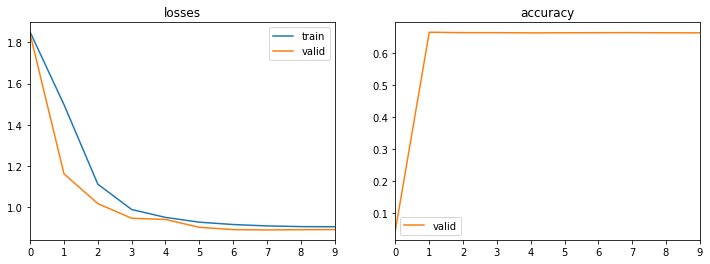

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': False, 'epochs': 10, 'hidden_size': 200, 'lr': 0.1, 'n_layers': 2, 'optimizer': <function RMSProp at 0x000002305F0AA1F8>, 'patience': 5, 'time_steps': 30}
LSTM                                                                                                                   
 10%|████▌                                         | 3/30 [10:14<1:48:18, 240.69s/trial, best loss: 0.8898538947105408]

epoch,train_loss,valid_loss,accuracy,time
0,1.341715,1.303500,0.664543,00:03
1,1.312010,1.168773,0.659669,00:03
2,1.105670,1.177147,0.636070,00:03
3,1.084276,1.199713,0.664350,00:03
4,1.053174,1.089201,0.662372,00:03
5,1.038383,1.083296,0.661020,00:03
6,1.026836,1.070081,0.659910,00:03
7,1.014026,1.065991,0.658655,00:03
8,1.017341,1.066708,0.661261,00:03
9,1.017650,1.065025,0.662468,00:03


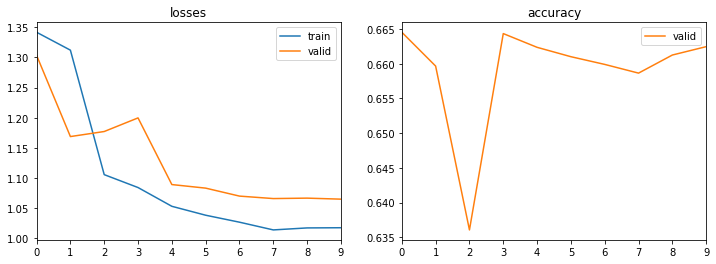

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': False, 'epochs': 10, 'hidden_size': 100, 'lr': 0.1, 'n_layers': 2, 'optimizer': <function RMSProp at 0x000002305F0AA1F8>, 'patience': 5, 'time_steps': 90}
LSTM                                                                                                                   
 13%|██████▏                                       | 4/30 [11:22<1:21:56, 189.10s/trial, best loss: 0.8898538947105408]

epoch,train_loss,valid_loss,accuracy,time
0,1.002449,1.023250,0.656484,00:04
1,1.027406,1.161339,0.664398,00:04
2,1.775644,1.478549,0.404179,00:04
3,1.630346,1.324192,0.584721,00:04
4,1.396348,1.344481,0.663916,00:04
5,1.225727,1.308834,0.663675,00:04


No improvement since epoch 0: early stopping                                                                           
 13%|██████▏                                       | 4/30 [11:49<1:21:56, 189.10s/trial, best loss: 0.8898538947105408]

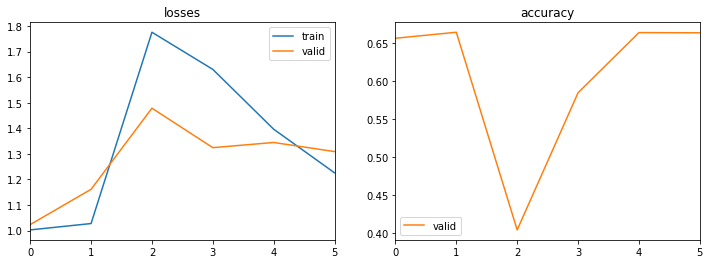

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': False, 'epochs': 50, 'hidden_size': 100, 'lr': 0.1, 'n_layers': 4, 'optimizer': <function SGD at 0x000002305F0AA0D8>, 'patience': 5, 'time_steps': 60}
LSTM                                                                                                                   
 17%|███████▋                                      | 5/30 [12:18<1:02:12, 149.28s/trial, best loss: 0.8898538947105408]

epoch,train_loss,valid_loss,accuracy,time
0,1.685626,1.619113,0.664543,00:05
1,1.499750,1.391680,0.664543,00:05
2,1.297284,1.195793,0.664543,00:05
3,1.190581,1.136155,0.664543,00:05
4,1.157235,1.127702,0.664543,00:05
5,1.144965,1.129825,0.664543,00:05
6,1.138492,1.134029,0.664543,00:05
7,1.136345,1.138306,0.664543,00:05
8,1.133896,1.140390,0.664543,00:05
9,1.134855,1.141345,0.664543,00:05


No improvement since epoch 4: early stopping                                                                           
 17%|███████▋                                      | 5/30 [13:13<1:02:12, 149.28s/trial, best loss: 0.8898538947105408]

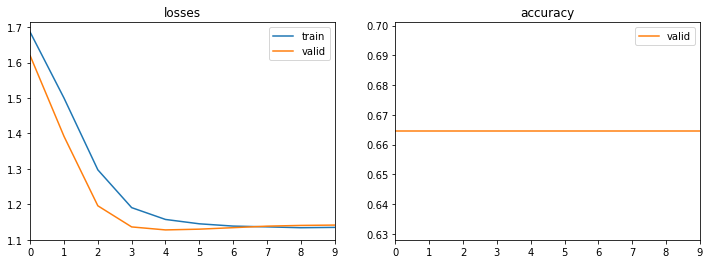

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 100, 'hidden_size': 100, 'lr': 0.0001, 'n_layers': 4, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 5, 'time_steps': 30}
LSTM                                                                                                                   
 20%|█████████▌                                      | 6/30 [13:42<51:49, 129.58s/trial, best loss: 0.8898538947105408]

epoch,train_loss,valid_loss,accuracy,time
0,1.750099,1.743950,0.664543,00:07
1,1.719019,1.708734,0.664543,00:07
2,1.662182,1.639106,0.664543,00:07
3,1.479931,1.389122,0.664543,00:07
4,1.163169,1.120363,0.664543,00:07
5,1.098860,1.083590,0.664543,00:07
6,1.038137,1.021399,0.664543,00:07
7,1.004264,0.972092,0.664495,00:07
8,0.980496,0.956993,0.663964,00:07
9,0.967495,0.948668,0.662758,00:07


No improvement since epoch 23: early stopping                                                                          
 20%|█████████▌                                      | 6/30 [17:13<51:49, 129.58s/trial, best loss: 0.8898538947105408]

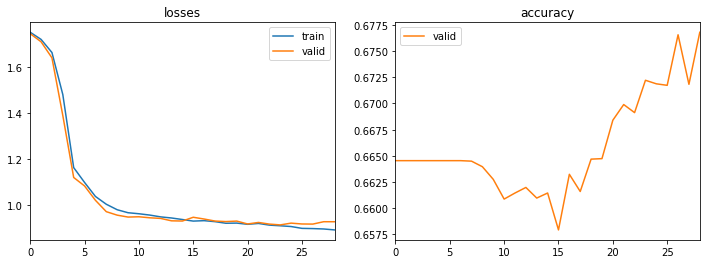

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 100, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 2, 'optimizer': <function SGD at 0x000002305F0AA0D8>, 'patience': 5, 'time_steps': 60}
LSTM                                                                                                                   
 23%|██████████▋                                   | 7/30 [17:43<1:02:22, 162.73s/trial, best loss: 0.8898538947105408]

epoch,train_loss,valid_loss,accuracy,time
0,1.758492,1.753028,0.503354,00:05
1,1.758169,1.752199,0.519521,00:05
2,1.756250,1.751115,0.538198,00:05
3,1.755612,1.749659,0.560446,00:05
4,1.753320,1.747712,0.581632,00:05
5,1.751856,1.745174,0.605473,00:05
6,1.748155,1.741948,0.627914,00:05
7,1.744263,1.737958,0.643453,00:05
8,1.740044,1.733141,0.653202,00:05
9,1.733669,1.727450,0.658993,00:05


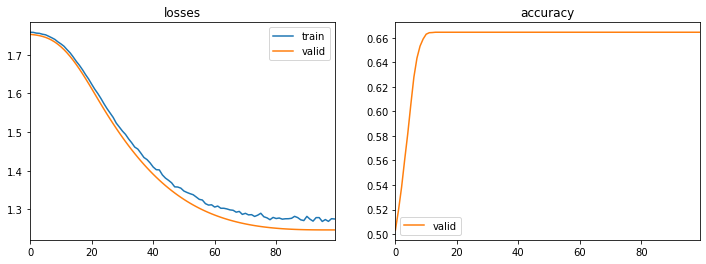

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 4, 'optimizer': <function SGD at 0x000002305F0AA0D8>, 'patience': 5, 'time_steps': 90}
LSTM                                                                                                                   
 27%|████████████▎                                 | 8/30 [27:41<1:47:37, 293.50s/trial, best loss: 0.8898538947105408]

epoch,train_loss,valid_loss,accuracy,time
0,1.851791,1.855664,0.048598,00:08
1,1.852061,1.854911,0.048598,00:08
2,1.850683,1.853578,0.048598,00:08
3,1.849115,1.851422,0.048598,00:08
4,1.845925,1.848258,0.048598,00:08
5,1.842065,1.843969,0.048598,00:08
6,1.837402,1.838514,0.048598,00:08
7,1.830686,1.831933,0.048598,00:08
8,1.823593,1.824342,0.048598,00:08
9,1.815742,1.815922,0.048598,00:08


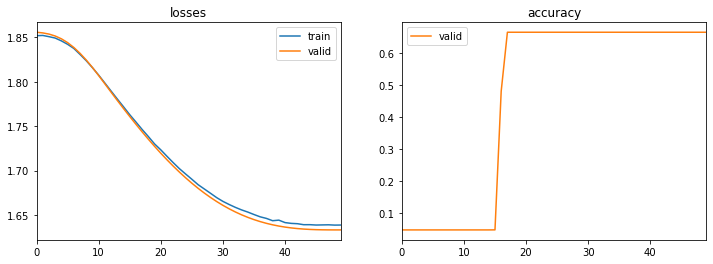

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 100, 'lr': 0.001, 'n_layers': 4, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 5, 'time_steps': 90}
LSTM                                                                                                                   
 30%|█████████████▊                                | 9/30 [35:23<2:00:12, 343.45s/trial, best loss: 0.8898538947105408]

epoch,train_loss,valid_loss,accuracy,time
0,1.213633,1.111494,0.664543,00:19
1,0.988212,0.931998,0.664447,00:19
2,0.904958,0.879765,0.657401,00:19
3,0.887321,0.857289,0.666184,00:19
4,0.868690,0.847886,0.681965,00:19
5,0.859824,0.843917,0.684475,00:19
6,0.853894,0.841586,0.688287,00:20
7,0.830821,0.815887,0.701704,00:19
8,0.824776,0.893328,0.684619,00:19
9,0.806008,0.830446,0.694320,00:20


No improvement since epoch 7: early stopping                                                                           
 30%|█████████████▊                                | 9/30 [39:42<2:00:12, 343.45s/trial, best loss: 0.8898538947105408]

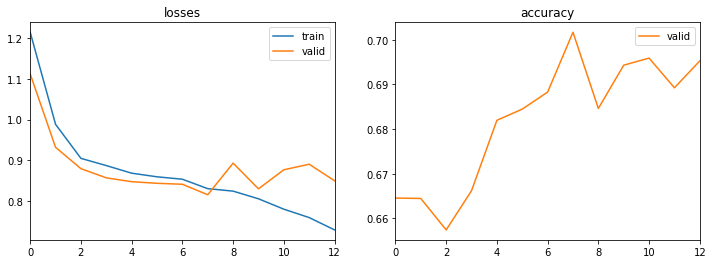

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.1, 'n_layers': 1, 'optimizer': <function RMSProp at 0x000002305F0AA1F8>, 'patience': 5, 'time_steps': 30}
LSTM                                                                                                                   
 33%|███████████████                              | 10/30 [40:11<1:49:10, 327.53s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,0.942319,0.969831,0.661648,00:03
1,0.915525,1.004168,0.654071,00:03
2,0.909780,0.964115,0.675257,00:03
3,0.906810,0.976757,0.666088,00:03
4,0.924693,1.012940,0.657015,00:03
5,0.957016,0.968192,0.670190,00:03
6,0.965218,1.010027,0.656532,00:03
7,0.974458,1.000941,0.638193,00:03


No improvement since epoch 2: early stopping                                                                           
 33%|███████████████                              | 10/30 [40:39<1:49:10, 327.53s/trial, best loss: 0.8501006364822388]

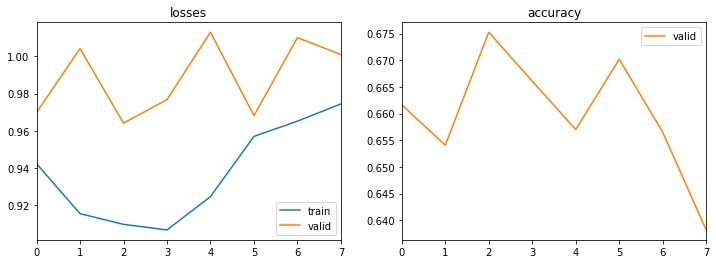

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 200, 'lr': 0.001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x000002305F0AA1F8>, 'patience': 5, 'time_steps': 90}
LSTM                                                                                                                   
 37%|████████████████▌                            | 11/30 [41:05<1:18:00, 246.34s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.040965,0.953019,0.662613,00:36
1,0.967740,0.905202,0.660875,00:37
2,0.948398,0.961626,0.657835,00:37
3,0.936650,0.930557,0.662902,00:37
4,0.931131,0.893682,0.672072,00:37
5,0.920045,1.005998,0.661261,00:37
6,0.916753,0.901443,0.671300,00:37
7,0.897495,0.907086,0.673423,00:37
8,0.886838,0.853844,0.678973,00:37
9,0.868723,0.816900,0.698567,00:37


No improvement since epoch 9: early stopping                                                                           
 37%|████████████████▌                            | 11/30 [50:31<1:18:00, 246.34s/trial, best loss: 0.8501006364822388]

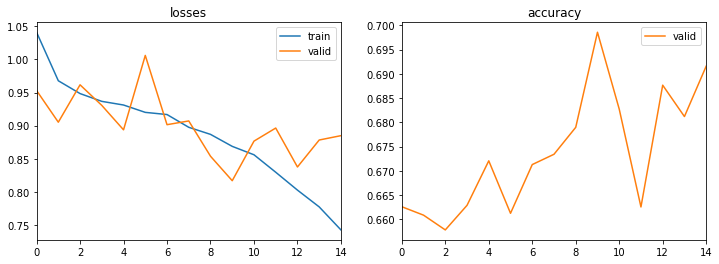

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': False, 'epochs': 50, 'hidden_size': 100, 'lr': 0.0001, 'n_layers': 5, 'optimizer': <function RMSProp at 0x000002305F0AA1F8>, 'patience': 10, 'time_steps': 30}
LSTM                                                                                                                   
 40%|██████████████████                           | 12/30 [50:56<1:44:59, 349.98s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.717914,1.707837,0.664543,00:07
1,1.271353,1.156035,0.664543,00:07
2,1.067875,1.069015,0.664543,00:07
3,1.003796,0.996736,0.664543,00:07
4,0.981033,0.974588,0.664543,00:07
5,0.977227,0.961388,0.664543,00:07
6,0.972734,0.974287,0.664061,00:07
7,0.954090,0.978101,0.655422,00:07
8,0.949528,0.966681,0.652912,00:07
9,0.957261,0.954016,0.653540,00:07


No improvement since epoch 23: early stopping                                                                          
 40%|██████████████████                           | 12/30 [55:25<1:44:59, 349.98s/trial, best loss: 0.8501006364822388]

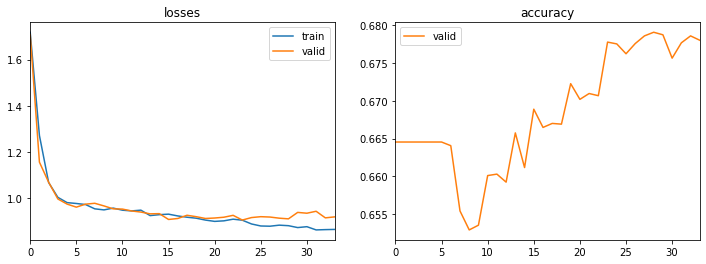

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 100, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 4, 'optimizer': <function RMSProp at 0x000002305F0AA1F8>, 'patience': 5, 'time_steps': 60}
LSTM                                                                                                                   
 43%|███████████████████▌                         | 13/30 [55:51<1:34:24, 333.20s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.782946,1.783326,0.048598,00:10
1,1.728794,1.723785,0.663578,00:10
2,1.588292,1.558137,0.664543,00:10
3,1.233894,1.188967,0.664543,00:10
4,1.128339,1.110208,0.664543,00:10
5,1.046830,1.051793,0.664350,00:10
6,0.987909,0.983396,0.663675,00:10
7,0.958339,0.934831,0.662130,00:10
8,0.935182,0.928462,0.656098,00:10
9,0.924855,0.909375,0.655760,00:10


No improvement since epoch 22: early stopping                                                                          
 43%|██████████████████▋                        | 13/30 [1:00:48<1:34:24, 333.20s/trial, best loss: 0.8501006364822388]

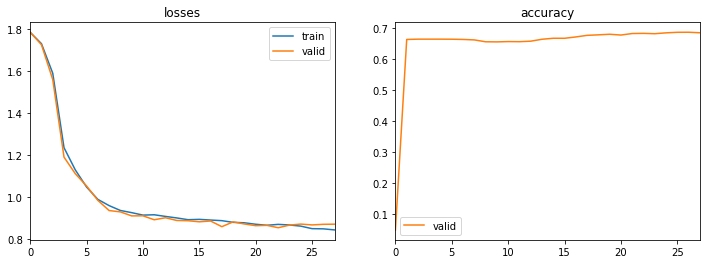

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': False, 'epochs': 50, 'hidden_size': 200, 'lr': 0.01, 'n_layers': 5, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 60}
LSTM                                                                                                                   
 47%|████████████████████                       | 14/30 [1:01:14<1:28:01, 330.12s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,0.960870,0.901747,0.666763,00:18
1,0.920998,0.929409,0.643309,00:19
2,0.907713,0.886938,0.680228,00:18
3,0.893990,0.834052,0.699773,00:18
4,0.863124,0.906222,0.679407,00:18
5,0.847393,0.963738,0.666474,00:18
6,0.793877,0.871637,0.694030,00:18
7,0.735756,1.002577,0.676415,00:18
8,0.680579,1.077633,0.650017,00:18
9,0.630395,1.073318,0.671879,00:19


No improvement since epoch 3: early stopping                                                                           
 47%|████████████████████                       | 14/30 [1:05:38<1:28:01, 330.12s/trial, best loss: 0.8501006364822388]

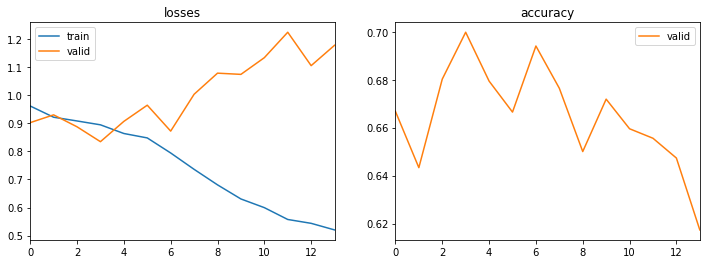

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': False, 'epochs': 100, 'hidden_size': 100, 'lr': 0.0001, 'n_layers': 1, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 5, 'time_steps': 30}
LSTM                                                                                                                   
 50%|█████████████████████▌                     | 15/30 [1:06:04<1:19:35, 318.34s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.811630,1.812012,0.088702,00:01
1,1.802754,1.801560,0.096038,00:01
2,1.790726,1.787637,0.121664,00:01
3,1.774109,1.767913,0.189807,00:01
4,1.749406,1.738814,0.380291,00:01
5,1.712276,1.693035,0.557936,00:01
6,1.648133,1.611604,0.628155,00:01
7,1.518533,1.435922,0.651513,00:01
8,1.250804,1.155941,0.658993,00:01
9,1.130435,1.102140,0.655953,00:01


No improvement since epoch 30: early stopping                                                                          
 50%|█████████████████████▌                     | 15/30 [1:06:45<1:19:35, 318.34s/trial, best loss: 0.8501006364822388]

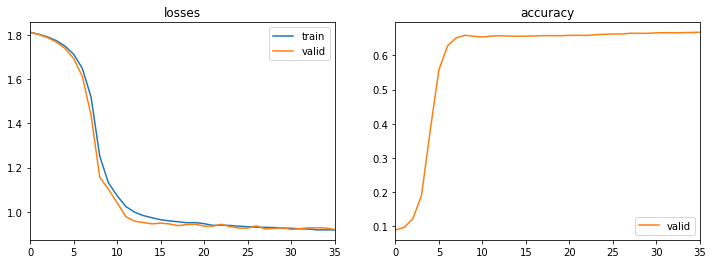

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.01, 'n_layers': 5, 'optimizer': <function SGD at 0x000002305F0AA0D8>, 'patience': 10, 'time_steps': 60}
LSTM                                                                                                                   
 53%|████████████████████████                     | 16/30 [1:07:10<56:38, 242.73s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.799547,1.795756,0.137879,00:06
1,1.773419,1.760628,0.137879,00:06
2,1.727185,1.701468,0.664543,00:06
3,1.654947,1.613937,0.664543,00:06
4,1.557640,1.502727,0.664543,00:06
5,1.447189,1.383361,0.664543,00:06
6,1.341722,1.278332,0.664543,00:06
7,1.260917,1.205408,0.664543,00:06
8,1.211344,1.165206,0.664543,00:06
9,1.185764,1.145965,0.664543,00:06


No improvement since epoch 15: early stopping                                                                          
 53%|████████████████████████                     | 16/30 [1:09:52<56:38, 242.73s/trial, best loss: 0.8501006364822388]

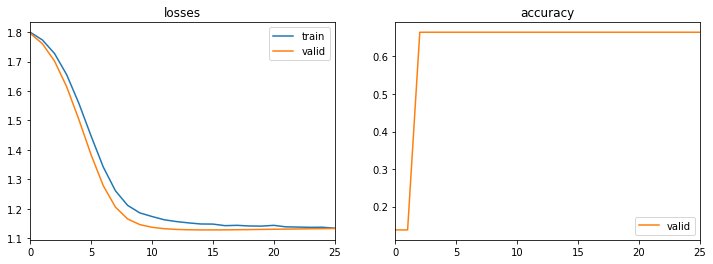

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 10, 'hidden_size': 200, 'lr': 0.0001, 'n_layers': 2, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 60}
LSTM                                                                                                                   
 57%|█████████████████████████▌                   | 17/30 [1:10:20<48:57, 225.98s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.198313,1.089373,0.661503,00:16
1,0.936652,0.905316,0.657594,00:17
2,0.903858,0.900139,0.667294,00:17
3,0.899049,0.899681,0.673375,00:17
4,0.886057,0.879728,0.682206,00:17
5,0.872579,0.864694,0.686453,00:17
6,0.864422,0.868972,0.686839,00:17
7,0.857440,0.870363,0.685681,00:17
8,0.857342,0.868682,0.687612,00:17
9,0.851754,0.866667,0.687949,00:17


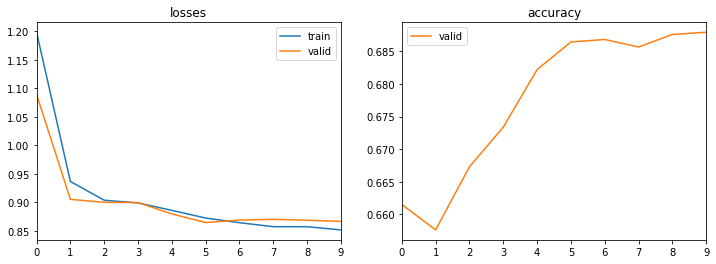

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 10, 'hidden_size': 100, 'lr': 0.0001, 'n_layers': 4, 'optimizer': <function RMSProp at 0x000002305F0AA1F8>, 'patience': 10, 'time_steps': 60}
LSTM                                                                                                                   
 60%|███████████████████████████                  | 18/30 [1:13:39<43:44, 218.70s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.412137,1.110278,0.664543,00:13
1,0.992472,0.930703,0.664205,00:13
2,0.939006,0.912226,0.656242,00:13
3,0.929031,0.916576,0.658462,00:13
4,0.910949,0.895628,0.666425,00:13
5,0.900881,0.888298,0.667342,00:13
6,0.887717,0.880855,0.672024,00:13
7,0.884105,0.872398,0.675884,00:13
8,0.877043,0.879753,0.674002,00:13
9,0.880807,0.876376,0.675016,00:13


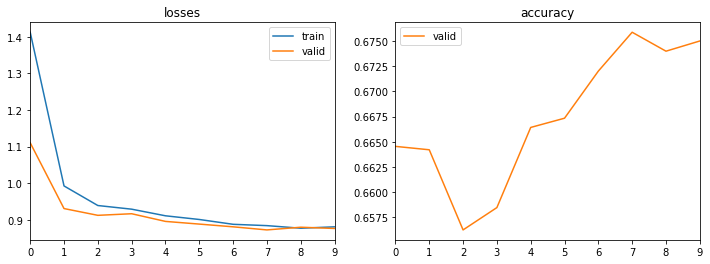

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': False, 'epochs': 10, 'hidden_size': 100, 'lr': 0.1, 'n_layers': 1, 'optimizer': <function SGD at 0x000002305F0AA0D8>, 'patience': 5, 'time_steps': 60}
LSTM                                                                                                                   
 63%|████████████████████████████▌                | 19/30 [1:16:20<36:51, 201.04s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.503102,1.295487,0.664543,00:01
1,1.166882,1.106634,0.664543,00:01
2,1.081080,1.081200,0.656966,00:01
3,1.034740,1.022273,0.658511,00:01
4,1.001531,0.987003,0.648424,00:01
5,0.968857,0.940274,0.654698,00:01
6,0.950894,0.933203,0.655277,00:01
7,0.936336,0.937028,0.656098,00:01
8,0.929501,0.928861,0.657739,00:01
9,0.927554,0.926699,0.657932,00:01


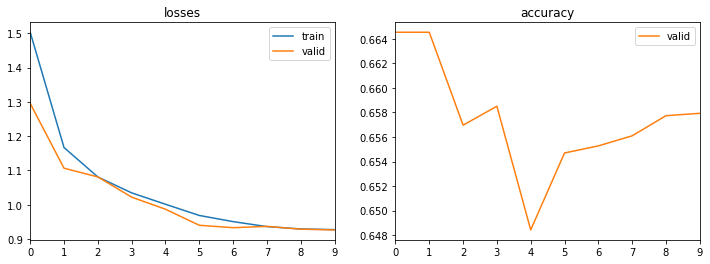

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 10, 'hidden_size': 200, 'lr': 0.001, 'n_layers': 2, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 90}
LSTM                                                                                                                   
 67%|██████████████████████████████               | 20/30 [1:17:04<25:40, 154.10s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,0.933925,0.905246,0.667825,00:24
1,0.880262,0.915297,0.680566,00:24
2,0.853757,0.825743,0.695719,00:25
3,0.794849,0.817002,0.694078,00:25
4,0.727727,0.891309,0.687756,00:25
5,0.680583,0.938785,0.682448,00:25
6,0.606446,0.933214,0.694127,00:25
7,0.576244,1.039098,0.687998,00:25
8,0.526965,1.060723,0.683558,00:25
9,0.514209,1.077527,0.681386,00:25


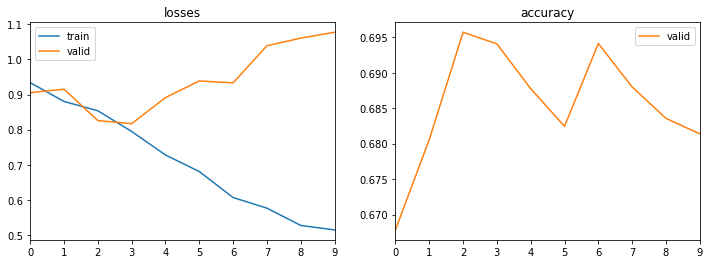

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 10, 'hidden_size': 200, 'lr': 0.001, 'n_layers': 2, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 90}
LSTM                                                                                                                   
 70%|███████████████████████████████▍             | 21/30 [1:21:42<28:42, 191.36s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.038083,0.927200,0.665653,00:22
1,0.896147,0.877960,0.683365,00:23
2,0.868030,0.826619,0.691135,00:23
3,0.837771,0.876797,0.686019,00:23
4,0.801724,0.836411,0.694802,00:23
5,0.757702,0.842184,0.700111,00:23
6,0.727947,0.877709,0.686212,00:23
7,0.692001,0.897330,0.686695,00:23
8,0.668744,0.905287,0.682206,00:23
9,0.661483,0.911274,0.681869,00:23


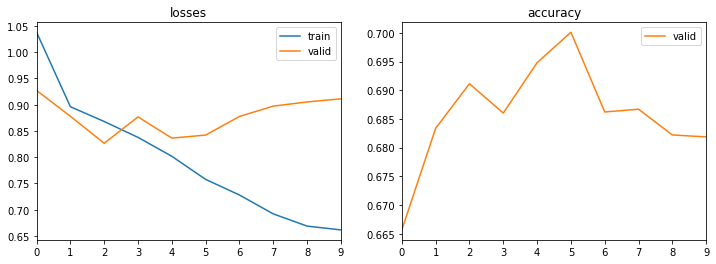

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 200, 'lr': 0.001, 'n_layers': 2, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 90}
LSTM                                                                                                                   
 73%|█████████████████████████████████            | 22/30 [1:26:02<28:17, 212.17s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.156727,1.072284,0.655856,00:22
1,0.945515,0.905573,0.654071,00:23
2,0.901782,0.884345,0.667198,00:23
3,0.882068,0.860393,0.679649,00:23
4,0.884162,0.882728,0.673954,00:23
5,0.865517,0.818350,0.697312,00:23
6,0.841319,0.849297,0.685006,00:24
7,0.824173,0.839960,0.689590,00:23
8,0.804204,0.915692,0.673085,00:23
9,0.784017,0.868834,0.683461,00:23


No improvement since epoch 5: early stopping                                                                           
 73%|█████████████████████████████████            | 22/30 [1:32:20<28:17, 212.17s/trial, best loss: 0.8501006364822388]

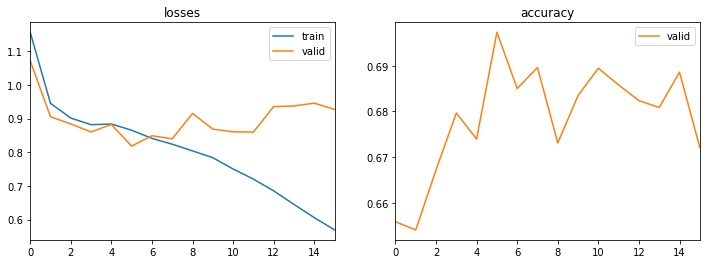

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 10, 'hidden_size': 200, 'lr': 0.001, 'n_layers': 4, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 60}
LSTM                                                                                                                   
 77%|██████████████████████████████████▌          | 23/30 [1:32:47<31:27, 269.63s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,0.941595,0.933733,0.663530,00:38
1,0.917479,0.878167,0.681289,00:39
2,0.885926,0.889321,0.684282,00:39
3,0.848677,0.867303,0.688866,00:39
4,0.809986,0.928284,0.672361,00:40
5,0.757795,0.945507,0.681434,00:39
6,0.716461,0.967501,0.679407,00:39
7,0.657758,1.021900,0.671927,00:39
8,0.617645,1.061915,0.672410,00:39
9,0.608233,1.064009,0.672120,00:40


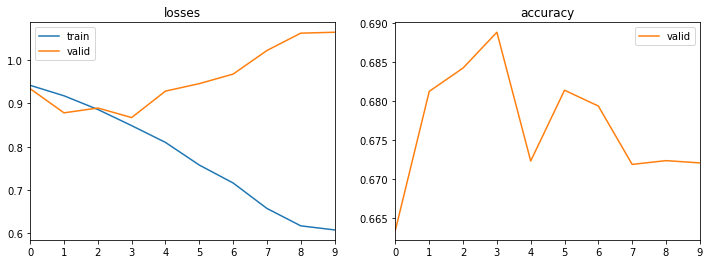

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 50, 'hidden_size': 100, 'lr': 0.001, 'n_layers': 2, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 60}
LSTM                                                                                                                   
 80%|████████████████████████████████████         | 24/30 [1:39:53<31:35, 315.87s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.078979,1.049418,0.656146,00:09
1,0.929644,0.910554,0.660489,00:09
2,0.908684,0.894162,0.668452,00:09
3,0.885997,0.914640,0.668356,00:09
4,0.881366,0.878096,0.683799,00:09
5,0.865636,0.857111,0.685488,00:09
6,0.853287,0.865598,0.685440,00:09
7,0.840024,0.881996,0.683703,00:09
8,0.824420,0.877011,0.683654,00:09
9,0.798481,0.891362,0.684571,00:09


No improvement since epoch 5: early stopping                                                                           
 80%|████████████████████████████████████         | 24/30 [1:42:23<31:35, 315.87s/trial, best loss: 0.8501006364822388]

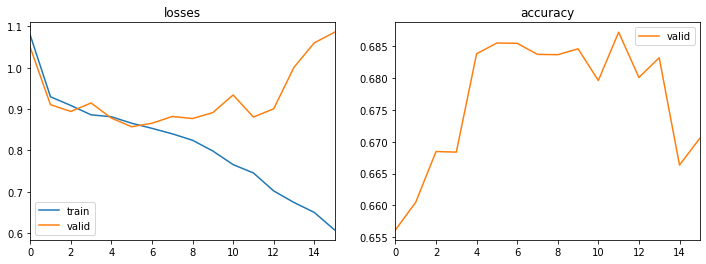

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 100, 'lr': 0.001, 'n_layers': 4, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 90}
LSTM                                                                                                                   
 83%|█████████████████████████████████████▌       | 25/30 [1:42:49<22:54, 274.80s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.225086,1.105126,0.664543,00:19
1,0.990424,0.941859,0.663675,00:19
2,0.913845,0.879986,0.661744,00:19
3,0.878934,0.864993,0.672024,00:19
4,0.870908,0.853192,0.684764,00:20
5,0.858726,0.828270,0.694995,00:20
6,0.848162,0.840706,0.689349,00:20
7,0.830129,0.786105,0.696202,00:20
8,0.813233,0.850482,0.688818,00:20
9,0.802205,0.847757,0.692631,00:20


No improvement since epoch 7: early stopping                                                                           
 83%|█████████████████████████████████████▌       | 25/30 [1:48:51<22:54, 274.80s/trial, best loss: 0.8501006364822388]

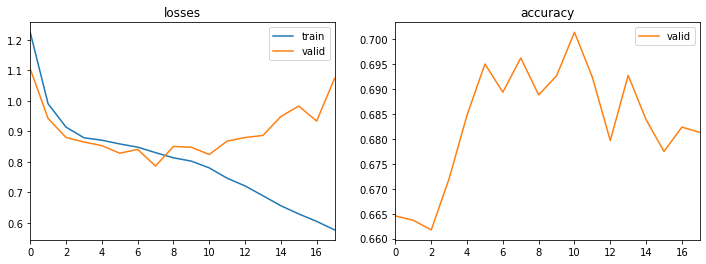

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 10, 'hidden_size': 200, 'lr': 0.01, 'n_layers': 2, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 90}
LSTM                                                                                                                   
 87%|███████████████████████████████████████      | 26/30 [1:49:17<20:35, 308.79s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,0.967247,0.941442,0.663192,00:22
1,0.928195,1.021743,0.633995,00:23
2,0.848321,0.910257,0.675981,00:23
3,0.753796,0.823708,0.703972,00:23
4,0.666734,0.913381,0.667728,00:24
5,0.581210,1.095552,0.675691,00:24
6,0.496143,1.233766,0.656484,00:23
7,0.414620,1.398589,0.660779,00:23
8,0.346585,1.561183,0.656146,00:23
9,0.302789,1.644178,0.654602,00:23


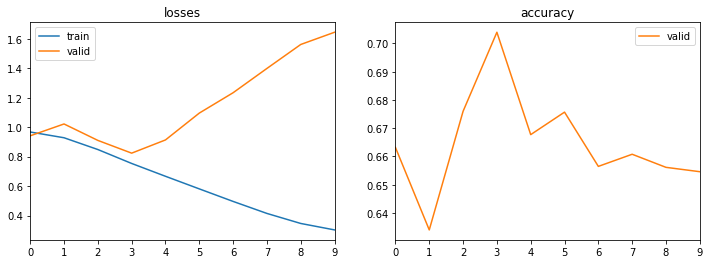

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 10, 'hidden_size': 200, 'lr': 0.001, 'n_layers': 4, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 60}
LSTM                                                                                                                   
 90%|████████████████████████████████████████▌    | 27/30 [1:53:41<14:44, 294.86s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,0.943849,0.899820,0.661889,00:38
1,0.902702,0.885007,0.684909,00:39
2,0.883834,0.879291,0.684282,00:39
3,0.857253,0.863541,0.680469,00:39
4,0.808348,0.886717,0.681627,00:39
5,0.771107,0.880938,0.686984,00:40
6,0.713472,0.919212,0.693596,00:40
7,0.664122,1.007180,0.683606,00:40
8,0.632079,1.012066,0.687949,00:40
9,0.620693,1.031795,0.685054,00:39


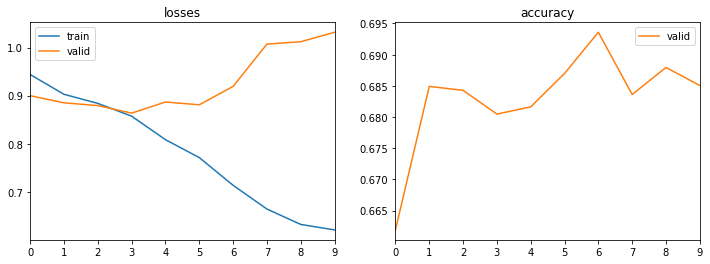

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 100, 'hidden_size': 100, 'lr': 0.01, 'n_layers': 3, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 90}
LSTM                                                                                                                   
 93%|██████████████████████████████████████████   | 28/30 [2:00:48<11:09, 334.51s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,0.903550,0.888286,0.674292,00:19
1,0.857994,0.881226,0.683027,00:20
2,0.849735,0.790408,0.704744,00:20
3,0.820809,0.838082,0.687708,00:20
4,0.797750,0.841347,0.688770,00:20
5,0.770209,0.893445,0.685633,00:21
6,0.721277,0.882397,0.693403,00:20
7,0.674874,0.886874,0.682206,00:21
8,0.645641,0.934839,0.654650,00:21
9,0.606922,1.018795,0.676753,00:21


No improvement since epoch 2: early stopping                                                                           
 93%|██████████████████████████████████████████   | 28/30 [2:05:19<11:09, 334.51s/trial, best loss: 0.8501006364822388]

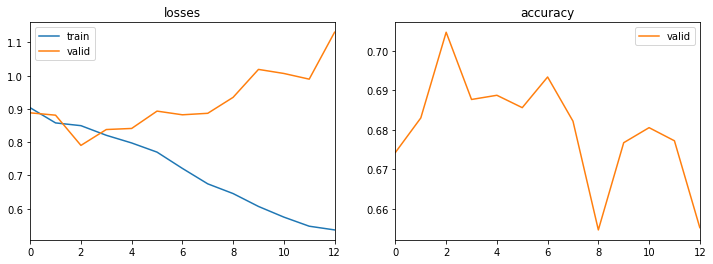

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 100, 'lr': 0.001, 'n_layers': 5, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 10, 'time_steps': 60}
LSTM                                                                                                                   
 97%|███████████████████████████████████████████▌ | 29/30 [2:05:48<05:23, 323.66s/trial, best loss: 0.8501006364822388]

epoch,train_loss,valid_loss,accuracy,time
0,1.223676,1.109636,0.664543,00:16
1,1.001605,0.951210,0.664543,00:17
2,0.931244,0.917091,0.662854,00:17
3,0.900451,0.887964,0.671541,00:17
4,0.893729,0.921055,0.674388,00:17
5,0.874143,0.886546,0.684619,00:17
6,0.869008,0.867728,0.688963,00:17
7,0.861693,0.865986,0.681820,00:17
8,0.848461,0.856231,0.695526,00:17
9,0.830055,0.871770,0.688577,00:17


No improvement since epoch 8: early stopping                                                                           
 97%|███████████████████████████████████████████▌ | 29/30 [2:11:16<05:23, 323.66s/trial, best loss: 0.8501006364822388]

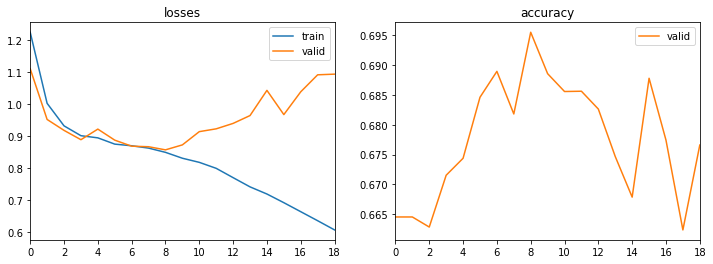

100%|█████████████████████████████████████████████| 30/30 [2:11:16<00:00, 262.55s/trial, best loss: 0.8501006364822388]


In [ ]:
trials = Trials()
best = fmin(create_model_hypopt,
    space=search_space,
    algo=tpe.suggest,
    max_evals=30,  # test trials
    trials=trials)

In [ ]:
print(best)

{'bidirectional': 0, 'bs': 1, 'epochs': 1, 'hidden_size': 1, 'lr': 2, 'n_layers': 3, 'optimizer': 0, 'patience': 0, 'ts': 2}


In [ ]:
from hyperopt import space_eval

In [ ]:
print("Best parameters:")
print(space_eval(search_space, best))

Best parameters:
{'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 100, 'lr': 0.001, 'n_layers': 4, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 5, 'time_steps': 90}


In [ ]:
best_parameters = space_eval(search_space, best)

In [ ]:
def build_model(params):
    # clear memory 
    gc.collect()
    print("Trying params:",params)
    batch_size = params["batch_size"]
    time_steps = params["time_steps"]
    
    # Create data loader
    tfms  = [None, [Categorize()]]
    dsets = TSDatasets(X[:, :, -time_steps:], y, tfms=tfms, splits=splits, inplace=True)
    # set num_workers for memory bottleneck
    dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[batch_size, batch_size], num_workers=0)
    
    # Create model
    arch = LSTM
    k = {
        'n_layers': params['n_layers'],
        'hidden_size': params['hidden_size'],
        'bidirectional': params['bidirectional']
    }
    model = create_model(arch, dls=dls, **k)
    print(model.__class__.__name__)
    
    # Training the model
    learn = Learner(dls, model, metrics=accuracy, opt_func=params['optimizer'])
    start = time.time()
    learn.fit_one_cycle(params['epochs'], lr_max=params['lr'],
                        cbs=EarlyStoppingCallback(monitor='valid_loss', min_delta=0.0, patience=params['patience']))
    learn.plot_metrics()
    elapsed = time.time() - start
    
    # delete tmp variables
    del dls
    del model
    return learn

Trying params: {'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 100, 'lr': 0.001, 'n_layers': 4, 'optimizer': <function Adam at 0x000002305F0AA438>, 'patience': 5, 'time_steps': 90}
LSTM


epoch,train_loss,valid_loss,accuracy,time
0,1.234790,1.119521,0.664543,00:19
1,0.991240,0.935764,0.663578,00:19
2,0.916780,0.883250,0.659090,00:19
3,0.884640,0.842047,0.674340,00:20
4,0.866482,0.835392,0.683606,00:20
5,0.858707,0.796591,0.699291,00:20
6,0.834851,0.787381,0.699580,00:20
7,0.823018,0.822851,0.700352,00:20
8,0.812412,0.796267,0.701221,00:20
9,0.791745,0.856510,0.693934,00:20


No improvement since epoch 6: early stopping


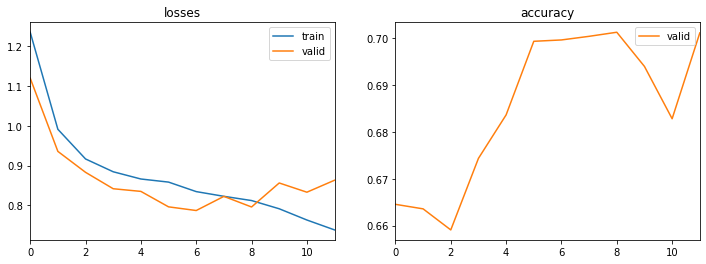

In [ ]:
learn = build_model(best_parameters)

In [ ]:
dls = learn.dls
valid_dl = dls.valid

In [ ]:
time_steps = best_parameters["time_steps"]
X_test_tmp = X_test[:, :, -time_steps:]

In [ ]:
test_ds = valid_dl.dataset.add_test(X_test_tmp, y_test)  # use the test data
test_dl = valid_dl.new(test_ds)
print(test_dl.n)

102430


In [ ]:
test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
test_probas, test_targets, test_preds

(tensor([[3.3335e-01, 4.6348e-01, 1.3974e-01, 5.5201e-02, 7.8851e-03, 3.3688e-04],
         [9.2359e-01, 6.5340e-02, 1.0216e-02, 8.2434e-04, 3.2468e-05, 2.3059e-06],
         [9.9584e-01, 3.7585e-03, 3.1800e-04, 7.6297e-05, 6.6180e-06, 3.4081e-07],
         ...,
         [9.9439e-01, 4.9541e-03, 5.0465e-04, 1.4202e-04, 1.2458e-05, 6.8621e-07],
         [9.9383e-01, 5.5735e-03, 5.0783e-04, 8.7024e-05, 5.0763e-06, 3.1969e-07],
         [9.6956e-01, 2.7377e-02, 2.5385e-03, 4.7216e-04, 5.0554e-05, 2.3816e-06]]),
 TensorCategory([1, 0, 0,  ..., 0, 0, 0], dtype=torch.int32),
 tensor([1, 0, 0,  ..., 0, 0, 0]))

In [ ]:
print(f'accuracy: {skm.accuracy_score(test_targets, test_preds):10.6f}')
print(f'f1 score: {skm.f1_score(test_targets, test_preds, average="weighted"):10.6f}')

accuracy:   0.719799
f1 score:   0.700531


if you want to Save the true and predicted results:

In [ ]:
y_test_true = test_targets.numpy()
y_test_pred = test_preds.numpy()

In [ ]:
np.save('y_true_LSTM', y_test_true)
np.save('y_pred_LSTM', y_test_pred)

#Deep Learning **GRU** implementation using same hypertunned variables

In [ ]:
import time
from fastai.callback.tracker import EarlyStoppingCallback

In [ ]:
import gc

In [ ]:
# clear memory 
gc.collect()

60

In [ ]:
def create_model_hypopt(params):
    
    try:
        # clear memory 
        gc.collect()
        print("Trying params:",params)
        batch_size = params["batch_size"]
        time_steps = params["time_steps"]
    
        # Create data loader
        tfms  = [None, [Categorize()]]
        dsets = TSDatasets(X[:, :, -time_steps:], y, tfms=tfms, splits=splits, inplace=True)
        # set num_workers for memory bottleneck
        dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[batch_size, batch_size], num_workers=0)
    
        # Create model
        arch = GRU
        k = {
            'n_layers': params['n_layers'],
            'hidden_size': params['hidden_size'],
            'bidirectional': params['bidirectional']
        }
        model = create_model(arch, dls=dls, **k)
        print(model.__class__.__name__)
    
        # Training the model
        learn = Learner(dls, model, metrics=accuracy, opt_func=params['optimizer'])
        start = time.time()
        learn.fit_one_cycle(params['epochs'], lr_max=params['lr'],
                            cbs=EarlyStoppingCallback(monitor='valid_loss', min_delta=0.0, patience=params['patience']))
        learn.plot_metrics()
        elapsed = time.time() - start
    
        vals = learn.recorder.values[-1]
        # vals[0], vals[1], vals[2]
        # train loss, valid loss, accuracy
        val_loss = vals[1]
    
        # delete tmp variables
        del dls
        del model
        del learn
        return {'loss': val_loss, 'status': STATUS_OK} # if accuracy use '-' sign, model is optional
    except:
        return {'loss': None, 'status': STATUS_FAIL}

Search the parameters: finding out which parameter best fits the model

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 100, 'hidden_size': 50, 'lr': 0.01, 'n_layers': 2, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 10, 'time_steps': 60}
GRU                                                                                                                    
  0%|                                                                           | 0/30 [00:32<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,accuracy,time
0,0.977475,0.928779,0.658028,00:02
1,0.932534,0.913029,0.671493,00:02
2,0.911409,0.909018,0.670093,00:02
3,0.904585,0.863681,0.681676,00:02
4,0.897335,0.908624,0.675354,00:02
5,0.885499,0.859605,0.689059,00:02
6,0.872847,0.875337,0.686357,00:02
7,0.860869,0.854643,0.687805,00:02
8,0.849114,0.889888,0.674292,00:02
9,0.837051,0.883142,0.676319,00:02


No improvement since epoch 7: early stopping                                                                           
  0%|                                                                           | 0/30 [01:19<?, ?trial/s, best loss=?]

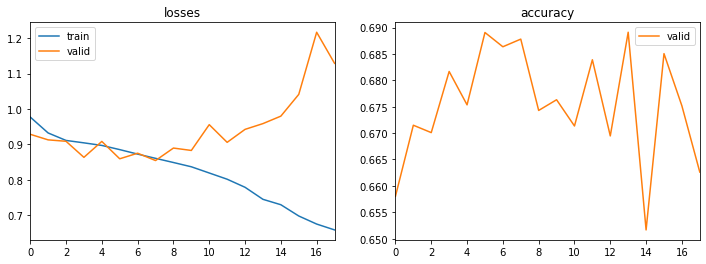

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': False, 'epochs': 100, 'hidden_size': 100, 'lr': 0.01, 'n_layers': 1, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 10, 'time_steps': 60}
GRU                                                                                                                    
  3%|█▋                                               | 1/30 [01:46<38:25, 79.51s/trial, best loss: 1.1290135383605957]

epoch,train_loss,valid_loss,accuracy,time
0,1.003366,0.937215,0.658897,00:02
1,0.923581,0.902635,0.667246,00:01
2,0.902908,0.888576,0.669514,00:02
3,0.887531,0.896157,0.668211,00:02
4,0.881344,0.907538,0.669707,00:01
5,0.855778,0.858375,0.683703,00:01
6,0.830393,0.834657,0.691135,00:02
7,0.802715,0.941452,0.668790,00:02
8,0.782113,0.867022,0.687081,00:02
9,0.746278,0.971476,0.665798,00:01


No improvement since epoch 6: early stopping                                                                           
  3%|█▋                                               | 1/30 [02:20<38:25, 79.51s/trial, best loss: 1.1290135383605957]

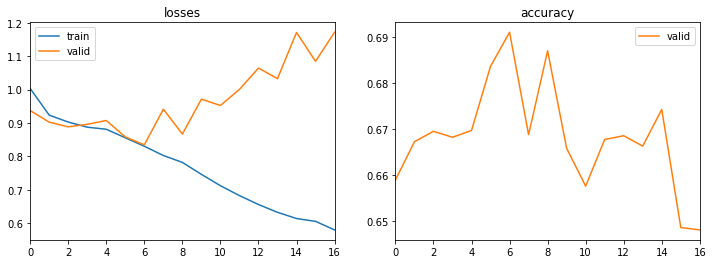

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': False, 'epochs': 10, 'hidden_size': 200, 'lr': 0.0001, 'n_layers': 4, 'optimizer': <function SGD at 0x00000243C597C0D8>, 'patience': 10, 'time_steps': 60}
GRU                                                                                                                    
  7%|███▎                                             | 2/30 [02:47<34:30, 73.96s/trial, best loss: 1.1290135383605957]

epoch,train_loss,valid_loss,accuracy,time
0,1.817616,1.817140,0.042807,00:11
1,1.813202,1.810376,0.043338,00:11
2,1.804624,1.800340,0.043675,00:11
3,1.795152,1.790686,0.047488,00:11
4,1.786412,1.782332,0.063462,00:11
5,1.779448,1.775810,0.128951,00:11
6,1.774169,1.771358,0.220163,00:11
7,1.770972,1.768861,0.285025,00:11
8,1.769293,1.767885,0.313595,00:11
9,1.768965,1.767743,0.316973,00:11


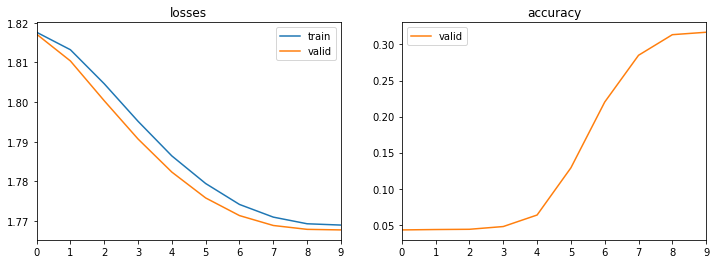

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 100, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 1, 'optimizer': <function SGD at 0x00000243C597C0D8>, 'patience': 10, 'time_steps': 30}
GRU                                                                                                                    
 10%|████▉                                            | 3/30 [05:09<42:32, 94.55s/trial, best loss: 1.1290135383605957]

epoch,train_loss,valid_loss,accuracy,time
0,1.872682,1.869745,0.041552,00:01
1,1.872337,1.869423,0.041600,00:01
2,1.871645,1.869002,0.041600,00:01
3,1.871240,1.868435,0.041552,00:01
4,1.870793,1.867677,0.041600,00:01
5,1.869469,1.866687,0.041697,00:01
6,1.868530,1.865426,0.041842,00:01
7,1.866979,1.863862,0.041842,00:01
8,1.865236,1.861967,0.042179,00:01
9,1.863433,1.859719,0.042566,00:01


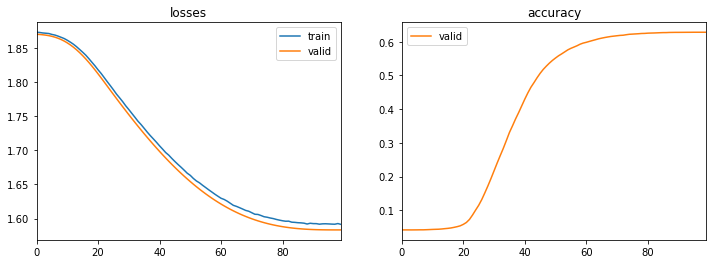

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': False, 'epochs': 100, 'hidden_size': 200, 'lr': 0.0001, 'n_layers': 5, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 10, 'time_steps': 60}
GRU                                                                                                                    
 13%|██████▍                                         | 4/30 [07:30<47:07, 108.74s/trial, best loss: 1.1290135383605957]

epoch,train_loss,valid_loss,accuracy,time
0,1.694889,1.648171,0.664543,00:14
1,1.532603,1.425679,0.664543,00:14
2,1.253888,1.138476,0.664543,00:15
3,1.119146,1.089881,0.663192,00:15
4,1.072036,1.054164,0.656629,00:15
5,1.042160,1.002363,0.654988,00:15
6,1.009054,0.956474,0.654891,00:15
7,0.973540,0.933107,0.651947,00:15
8,0.958178,0.927719,0.654795,00:15
9,0.947018,0.924178,0.656146,00:15


No improvement since epoch 21: early stopping                                                                          
 13%|██████▍                                         | 4/30 [15:36<47:07, 108.74s/trial, best loss: 1.1290135383605957]

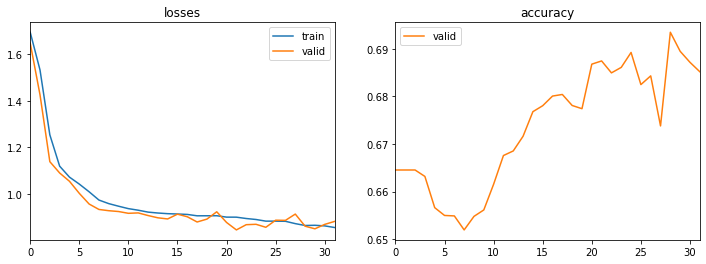

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 10, 'hidden_size': 100, 'lr': 0.0001, 'n_layers': 4, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 17%|███████▋                                      | 5/30 [16:02<1:35:43, 229.73s/trial, best loss: 0.8816114664077759]

epoch,train_loss,valid_loss,accuracy,time
0,1.720768,1.607697,0.664447,00:15
1,1.187360,1.059892,0.650210,00:15
2,1.012771,0.945331,0.656484,00:15
3,0.929972,0.883981,0.670576,00:15
4,0.900364,0.866027,0.675884,00:15
5,0.884563,0.862692,0.680807,00:15
6,0.876553,0.839662,0.682496,00:15
7,0.871320,0.852055,0.679986,00:15
8,0.872404,0.850142,0.681434,00:15
9,0.871195,0.850363,0.680952,00:15


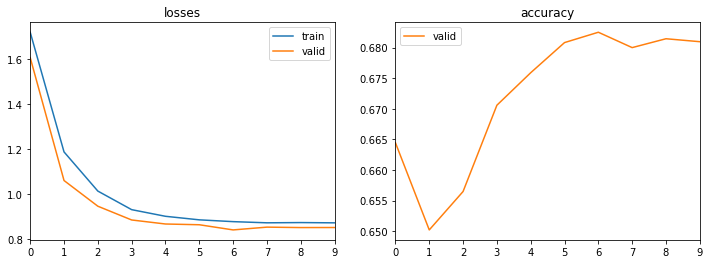

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 100, 'hidden_size': 100, 'lr': 0.001, 'n_layers': 5, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 10, 'time_steps': 90}
GRU                                                                                                                    
 20%|█████████▏                                    | 6/30 [19:05<1:26:17, 215.74s/trial, best loss: 0.8503633737564087]

epoch,train_loss,valid_loss,accuracy,time
0,1.009389,0.977450,0.658076,00:28
1,0.904031,0.886385,0.670914,00:29
2,0.885947,0.866858,0.686453,00:29
3,0.863348,0.864593,0.685392,00:29
4,0.847775,0.838776,0.687177,00:29
5,0.848395,0.846586,0.691038,00:29
6,0.826804,0.855640,0.688915,00:29
7,0.805870,0.812168,0.698615,00:30
8,0.768365,0.842783,0.691810,00:29
9,0.739713,0.818611,0.699677,00:29


No improvement since epoch 7: early stopping                                                                           
 20%|█████████▏                                    | 6/30 [27:54<1:26:17, 215.74s/trial, best loss: 0.8503633737564087]

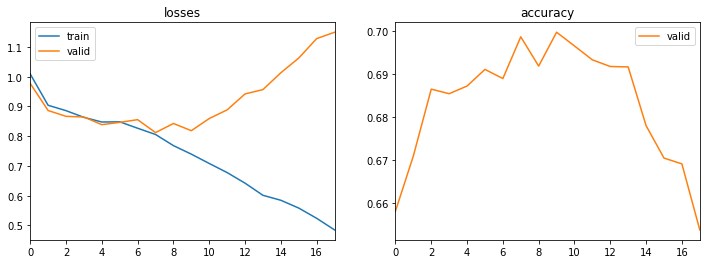

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 50, 'hidden_size': 100, 'lr': 0.1, 'n_layers': 5, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 23%|██████████▋                                   | 7/30 [28:20<2:01:42, 317.48s/trial, best loss: 0.8503633737564087]

epoch,train_loss,valid_loss,accuracy,time
0,0.933489,0.894314,0.655760,00:28
1,0.892479,1.059505,0.673471,00:29
2,0.958230,0.930898,0.671010,00:28
3,1.071183,1.041076,0.663192,00:28
4,1.152108,1.124873,0.664543,00:29
5,1.139953,1.137285,0.664543,00:29


No improvement since epoch 0: early stopping                                                                           
 23%|██████████▋                                   | 7/30 [31:14<2:01:42, 317.48s/trial, best loss: 0.8503633737564087]

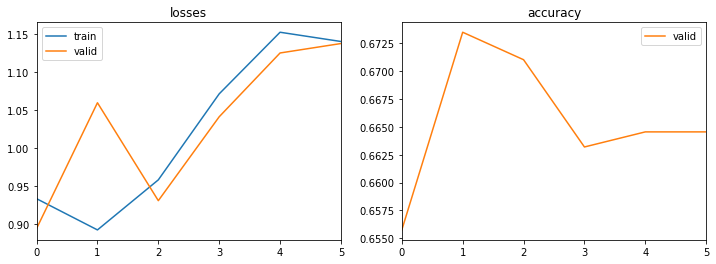

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': False, 'epochs': 100, 'hidden_size': 100, 'lr': 0.1, 'n_layers': 2, 'optimizer': <function SGD at 0x00000243C597C0D8>, 'patience': 5, 'time_steps': 30}
GRU                                                                                                                    
 27%|████████████▎                                 | 8/30 [31:44<1:43:30, 282.30s/trial, best loss: 0.8503633737564087]

epoch,train_loss,valid_loss,accuracy,time
0,1.608571,1.503495,0.664543,00:01
1,1.361580,1.249676,0.664543,00:01
2,1.197933,1.136894,0.664543,00:01
3,1.131754,1.107340,0.664591,00:01
4,1.096905,1.093820,0.662420,00:01
5,1.083306,1.085557,0.656677,00:01
6,1.068788,1.077953,0.651899,00:01
7,1.060160,1.069684,0.649776,00:01
8,1.055788,1.060358,0.647749,00:01
9,1.046682,1.052159,0.646542,00:01


No improvement since epoch 39: early stopping                                                                          
 27%|████████████▎                                 | 8/30 [32:53<1:43:30, 282.30s/trial, best loss: 0.8503633737564087]

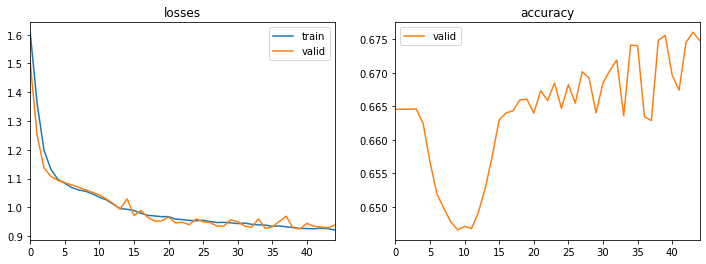

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': False, 'epochs': 50, 'hidden_size': 100, 'lr': 0.01, 'n_layers': 5, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 60}
GRU                                                                                                                    
 30%|█████████████▊                                | 9/30 [33:21<1:19:32, 227.24s/trial, best loss: 0.8503633737564087]

epoch,train_loss,valid_loss,accuracy,time
0,0.940559,0.938243,0.670383,00:06
1,0.919790,0.951900,0.654023,00:06
2,0.909546,0.916226,0.666667,00:06
3,0.892489,0.948293,0.652526,00:06
4,0.877936,1.004818,0.675884,00:06
5,0.813038,0.986031,0.662227,00:06
6,0.767550,0.945458,0.658318,00:06
7,0.733931,1.092407,0.666184,00:06


No improvement since epoch 2: early stopping                                                                           
 30%|█████████████▊                                | 9/30 [34:10<1:19:32, 227.24s/trial, best loss: 0.8503633737564087]

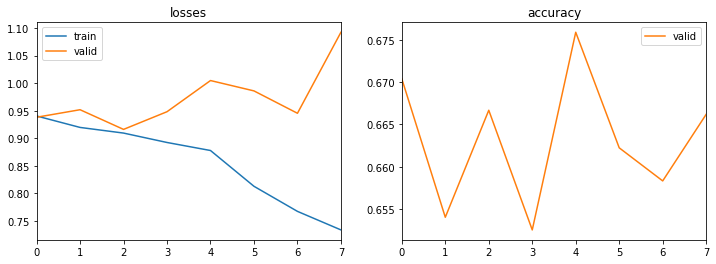

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': True, 'epochs': 100, 'hidden_size': 200, 'lr': 0.1, 'n_layers': 5, 'optimizer': <function SGD at 0x00000243C597C0D8>, 'patience': 5, 'time_steps': 60}
GRU                                                                                                                    
 33%|███████████████                              | 10/30 [34:39<1:00:40, 182.05s/trial, best loss: 0.8503633737564087]

epoch,train_loss,valid_loss,accuracy,time
0,1.129066,1.108824,0.664543,00:42
1,1.083612,1.090649,0.662178,00:43
2,1.055213,1.063664,0.652961,00:43
3,1.047014,1.036412,0.647893,00:44
4,1.026827,1.024267,0.646687,00:44
5,1.009164,1.009379,0.645577,00:45
6,0.991363,0.995172,0.652719,00:45
7,0.976877,0.982025,0.663481,00:45
8,0.956006,0.946653,0.666184,00:45
9,0.961489,0.939592,0.665364,00:46


No improvement since epoch 29: early stopping                                                                          
 33%|██████████████▎                            | 10/30 [1:01:56<1:00:40, 182.05s/trial, best loss: 0.8503633737564087]

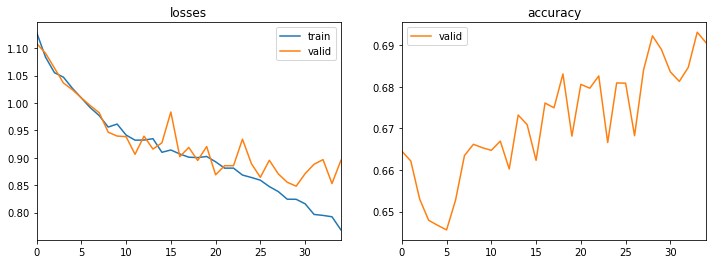

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.001, 'n_layers': 1, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 5, 'time_steps': 30}
GRU                                                                                                                    
 37%|███████████████▊                           | 11/30 [1:02:26<3:18:41, 627.43s/trial, best loss: 0.8503633737564087]

epoch,train_loss,valid_loss,accuracy,time
0,1.620625,1.590458,0.581632,00:02
1,1.203952,1.148417,0.631147,00:02
2,1.038401,1.018095,0.651272,00:02
3,0.988137,0.970552,0.651996,00:02
4,0.954161,0.951672,0.657015,00:02
5,0.946415,0.939164,0.663771,00:02
6,0.937948,0.931297,0.665846,00:02
7,0.936400,0.923472,0.664881,00:02
8,0.924381,0.930990,0.663723,00:02
9,0.922721,0.934935,0.667004,00:02


No improvement since epoch 15: early stopping                                                                          
 37%|███████████████▊                           | 11/30 [1:03:12<3:18:41, 627.43s/trial, best loss: 0.8503633737564087]

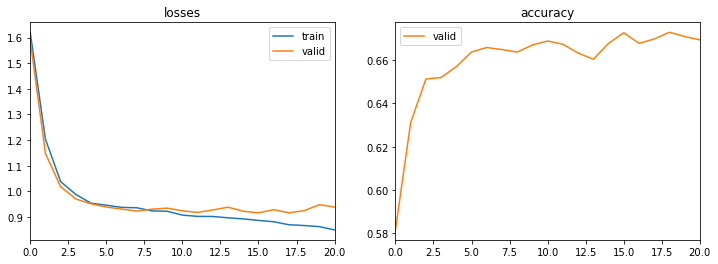

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': False, 'epochs': 10, 'hidden_size': 100, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 60}
GRU                                                                                                                    
 40%|█████████████████▏                         | 12/30 [1:03:41<2:18:31, 461.77s/trial, best loss: 0.8503633737564087]

epoch,train_loss,valid_loss,accuracy,time
0,1.677412,1.570191,0.664495,00:03
1,1.170557,1.036852,0.655422,00:03
2,1.015439,0.957336,0.654216,00:03
3,0.958187,0.931901,0.655181,00:03
4,0.938663,0.912771,0.658800,00:03
5,0.927130,0.913824,0.661165,00:03
6,0.922884,0.910639,0.662758,00:03
7,0.916182,0.904272,0.663771,00:03
8,0.915396,0.905585,0.665026,00:03
9,0.915886,0.904905,0.664978,00:03


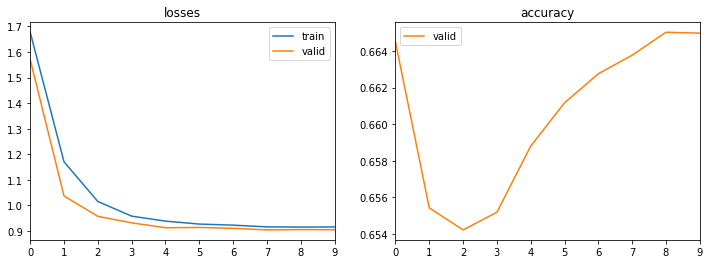

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 43%|██████████████████▋                        | 13/30 [1:04:48<1:37:15, 343.27s/trial, best loss: 0.8503633737564087]

epoch,train_loss,valid_loss,accuracy,time
0,1.805815,1.790949,0.031514,00:05
1,1.761306,1.735488,0.284832,00:04
2,1.677225,1.624202,0.621736,00:04
3,1.496506,1.390906,0.663047,00:04
4,1.246484,1.162478,0.664447,00:04
5,1.130036,1.098270,0.662372,00:05
6,1.078793,1.054796,0.655036,00:05
7,1.037941,1.000853,0.657304,00:05
8,0.996980,0.953505,0.657015,00:05
9,0.947313,0.909842,0.664398,00:05


No improvement since epoch 23: early stopping                                                                          
 43%|██████████████████▋                        | 13/30 [1:07:16<1:37:15, 343.27s/trial, best loss: 0.8503633737564087]

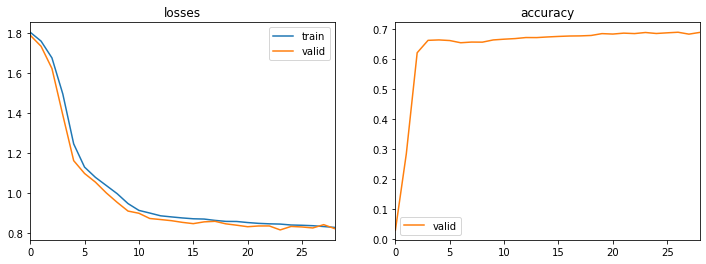

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': False, 'epochs': 50, 'hidden_size': 50, 'lr': 0.1, 'n_layers': 3, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 10, 'time_steps': 30}
GRU                                                                                                                    
 47%|████████████████████                       | 14/30 [1:07:45<1:18:17, 293.58s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,0.926707,0.913056,0.677863,00:04
1,0.865019,1.037070,0.646590,00:04
2,0.849614,1.053275,0.654988,00:04
3,0.911732,1.000120,0.667101,00:04
4,0.997312,0.968543,0.662999,00:04
5,1.039573,1.055870,0.655856,00:04
6,1.048997,1.109518,0.661020,00:04
7,1.052100,1.095812,0.660875,00:04
8,1.060730,1.104116,0.664350,00:04
9,1.080025,1.103802,0.664447,00:04


No improvement since epoch 0: early stopping                                                                           
 47%|████████████████████                       | 14/30 [1:08:37<1:18:17, 293.58s/trial, best loss: 0.8221107721328735]

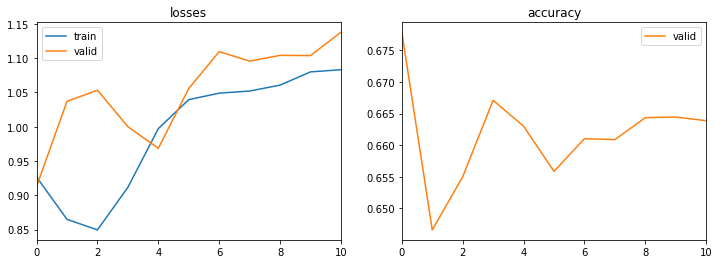

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 100, 'hidden_size': 50, 'lr': 0.001, 'n_layers': 5, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 10, 'time_steps': 30}
GRU                                                                                                                    
 50%|██████████████████████▌                      | 15/30 [1:09:04<57:26, 229.78s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.089682,1.071460,0.655132,00:05
1,1.025028,0.986655,0.655181,00:05
2,0.974016,0.952566,0.659138,00:05
3,0.960607,0.937683,0.666522,00:05
4,0.950289,0.933530,0.668259,00:05
5,0.944691,0.916156,0.670865,00:05
6,0.940262,0.926902,0.671493,00:05
7,0.939458,0.921882,0.672024,00:05
8,0.939288,1.019875,0.664640,00:05
9,0.930644,0.911597,0.679456,00:05


No improvement since epoch 9: early stopping                                                                           
 50%|██████████████████████▌                      | 15/30 [1:10:51<57:26, 229.78s/trial, best loss: 0.8221107721328735]

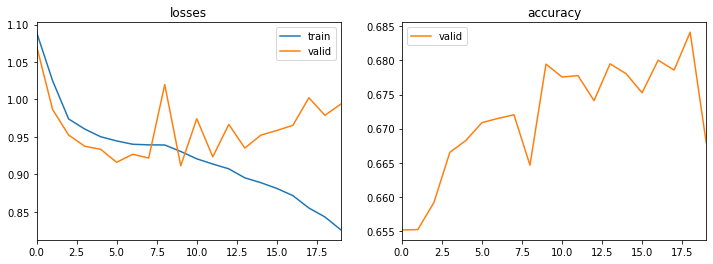

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 100, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 10, 'time_steps': 30}
GRU                                                                                                                    
 53%|████████████████████████                     | 16/30 [1:11:17<46:52, 200.90s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.741960,1.732555,0.585445,00:02
1,1.715012,1.700641,0.650644,00:02
2,1.677607,1.657610,0.662082,00:02
3,1.624854,1.595832,0.664543,00:02
4,1.547747,1.505192,0.664543,00:02
5,1.435965,1.375578,0.664543,00:02
6,1.292103,1.224680,0.664543,00:02
7,1.172104,1.131731,0.664688,00:02
8,1.114460,1.094852,0.660538,00:02
9,1.081510,1.066149,0.656629,00:02


No improvement since epoch 44: early stopping                                                                          
 53%|████████████████████████                     | 16/30 [1:13:29<46:52, 200.90s/trial, best loss: 0.8221107721328735]

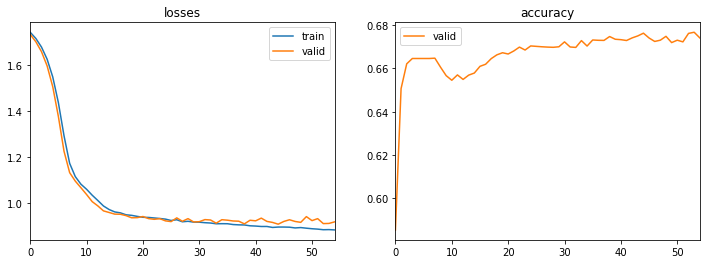

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 100, 'hidden_size': 200, 'lr': 0.001, 'n_layers': 2, 'optimizer': <function SGD at 0x00000243C597C0D8>, 'patience': 10, 'time_steps': 60}
GRU                                                                                                                    
 57%|█████████████████████████▌                   | 17/30 [1:13:59<40:46, 188.17s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.827756,1.829803,0.066116,00:13
1,1.824089,1.825343,0.066406,00:13
2,1.819013,1.819545,0.067130,00:13
3,1.812266,1.811787,0.067902,00:13
4,1.803310,1.801504,0.070894,00:13
5,1.791536,1.788206,0.105738,00:13
6,1.776626,1.771499,0.231553,00:14
7,1.758428,1.751081,0.425896,00:14
8,1.736206,1.726762,0.616862,00:14
9,1.710109,1.698458,0.658607,00:14


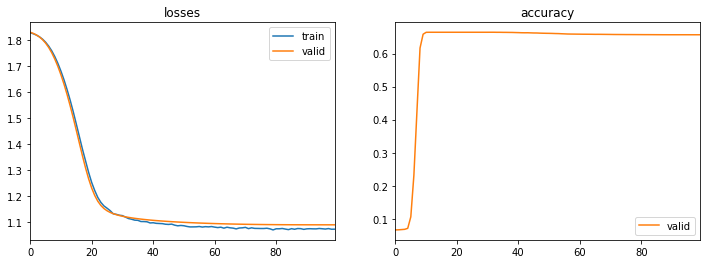

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 10, 'hidden_size': 200, 'lr': 0.1, 'n_layers': 1, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 60%|█████████████████████████▊                 | 18/30 [1:38:46<1:55:48, 579.02s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.551148,1.082240,0.618117,00:06
1,4.763547,5.856024,0.338015,00:06
2,4.820130,2.621846,0.520631,00:07
3,4.176042,5.821884,0.541962,00:07
4,3.374362,3.055230,0.330486,00:07
5,2.599416,2.447836,0.512137,00:07


No improvement since epoch 0: early stopping                                                                           
 60%|█████████████████████████▊                 | 18/30 [1:39:29<1:55:48, 579.02s/trial, best loss: 0.8221107721328735]

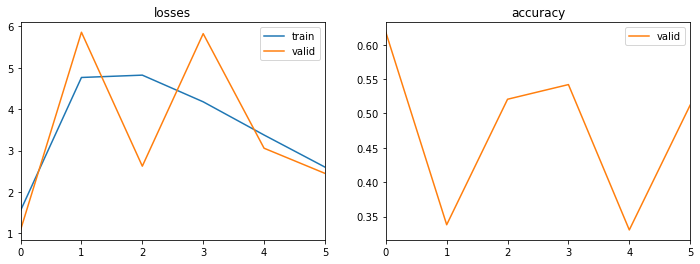

Trying params:                                                                                                         
{'batch_size': 256, 'bidirectional': False, 'epochs': 50, 'hidden_size': 200, 'lr': 0.01, 'n_layers': 2, 'optimizer': <function SGD at 0x00000243C597C0D8>, 'patience': 5, 'time_steps': 60}
GRU                                                                                                                    
 63%|███████████████████████████▏               | 19/30 [1:39:54<1:18:05, 425.99s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.650896,1.625045,0.664543,00:06
1,1.468424,1.428611,0.664543,00:06
2,1.234816,1.196825,0.664543,00:06
3,1.119375,1.113874,0.664543,00:07
4,1.090733,1.094391,0.664350,00:07
5,1.063662,1.081407,0.659814,00:07
6,1.061049,1.073013,0.654746,00:07
7,1.060929,1.063650,0.651272,00:07
8,1.039760,1.055280,0.649245,00:07
9,1.038123,1.046228,0.648617,00:07


No improvement since epoch 31: early stopping                                                                          
 63%|███████████████████████████▏               | 19/30 [1:44:25<1:18:05, 425.99s/trial, best loss: 0.8221107721328735]

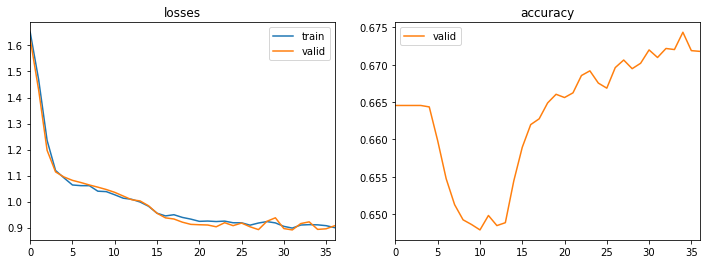

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 10, 'hidden_size': 100, 'lr': 0.0001, 'n_layers': 4, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 67%|████████████████████████████▋              | 20/30 [1:44:54<1:04:30, 387.03s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.719056,1.600552,0.654071,00:15
1,1.180717,1.045967,0.655422,00:16
2,1.013703,0.933151,0.655712,00:16
3,0.930324,0.899130,0.669900,00:16
4,0.898319,0.887629,0.677622,00:17
5,0.886629,0.864912,0.681965,00:17
6,0.880548,0.869073,0.678683,00:17
7,0.875114,0.859901,0.683172,00:17
8,0.872364,0.853540,0.683606,00:17
9,0.871047,0.852775,0.684233,00:17


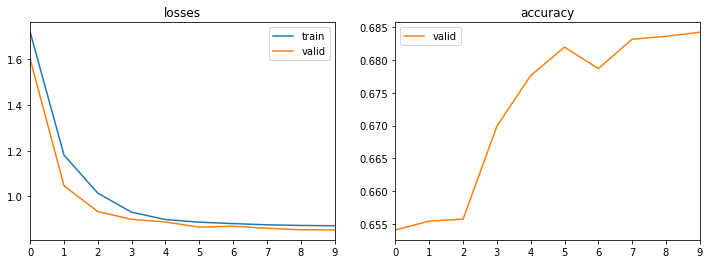

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 10, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 4, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 70%|███████████████████████████████▍             | 21/30 [1:48:09<49:32, 330.24s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.749219,1.687330,0.517205,00:06
1,1.313296,1.129318,0.661261,00:06
2,1.093070,1.044183,0.651320,00:06
3,1.009475,0.973154,0.655760,00:06
4,0.960636,0.930156,0.661503,00:06
5,0.927837,0.915560,0.666908,00:06
6,0.910789,0.901059,0.671203,00:06
7,0.902124,0.886978,0.673471,00:06
8,0.902480,0.888315,0.673616,00:07
9,0.897884,0.887519,0.673761,00:07


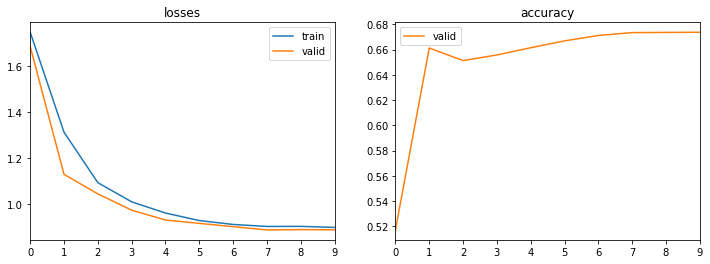

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 100, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function Adam at 0x00000243C597C438>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 73%|█████████████████████████████████            | 22/30 [1:49:44<34:37, 259.69s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.811785,1.803417,0.081946,00:11
1,1.762748,1.736858,0.332754,00:11
2,1.649953,1.576398,0.661358,00:12
3,1.348342,1.182547,0.664543,00:12
4,1.121271,1.079664,0.653926,00:12
5,1.057064,1.030830,0.649824,00:12
6,1.017848,0.993247,0.649293,00:12
7,0.961078,0.939042,0.653202,00:12
8,0.924058,0.910436,0.661213,00:12
9,0.904794,0.884552,0.670045,00:12


No improvement since epoch 21: early stopping                                                                          
 73%|█████████████████████████████████            | 22/30 [1:55:30<34:37, 259.69s/trial, best loss: 0.8221107721328735]

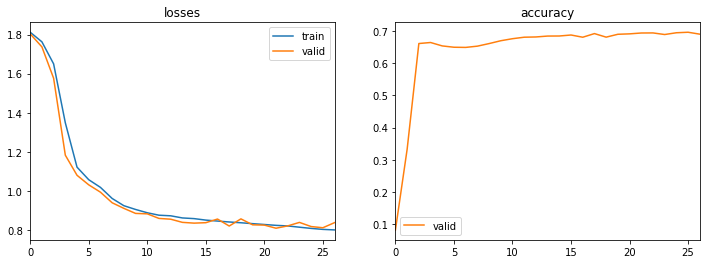

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 77%|██████████████████████████████████▌          | 23/30 [1:55:56<34:13, 293.29s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.794467,1.780726,0.299165,00:04
1,1.751509,1.727788,0.500796,00:05
2,1.674349,1.629495,0.660682,00:05
3,1.521786,1.432774,0.664398,00:05
4,1.275732,1.181615,0.662275,00:05
5,1.127277,1.091594,0.658511,00:05
6,1.071251,1.047303,0.655229,00:05
7,1.036785,0.998053,0.659379,00:05
8,1.000217,0.948529,0.660441,00:05
9,0.952177,0.900171,0.661117,00:05


No improvement since epoch 25: early stopping                                                                          
 77%|██████████████████████████████████▌          | 23/30 [1:58:41<34:13, 293.29s/trial, best loss: 0.8221107721328735]

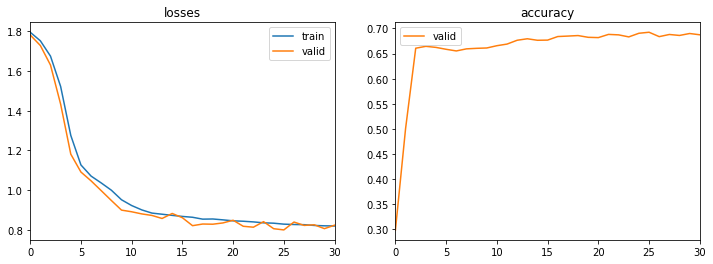

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 80%|████████████████████████████████████         | 24/30 [1:59:11<26:16, 262.75s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.751090,1.747487,0.296993,00:05
1,1.716164,1.703913,0.473288,00:05
2,1.652157,1.620435,0.601515,00:05
3,1.519483,1.445508,0.650065,00:05
4,1.290274,1.195228,0.660586,00:05
5,1.135043,1.098970,0.657352,00:05
6,1.073598,1.054822,0.653926,00:05
7,1.033449,1.014229,0.656629,00:05
8,0.997003,0.961670,0.661117,00:05
9,0.950647,0.906352,0.661792,00:05


No improvement since epoch 24: early stopping                                                                          
 80%|████████████████████████████████████         | 24/30 [2:01:51<26:16, 262.75s/trial, best loss: 0.8221107721328735]

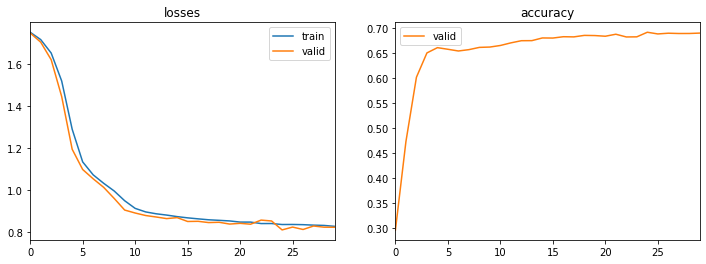

Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 83%|█████████████████████████████████████▌       | 25/30 [2:02:17<20:04, 240.97s/trial, best loss: 0.8221107721328735]

epoch,train_loss,valid_loss,accuracy,time
0,1.752848,1.739498,0.468028,00:04
1,1.718520,1.697249,0.575262,00:04
2,1.652540,1.613159,0.631002,00:04
3,1.509970,1.427162,0.643984,00:05
4,1.264092,1.171316,0.650451,00:05
5,1.127055,1.085139,0.655760,00:05
6,1.076335,1.044830,0.655905,00:05
7,1.037859,1.009720,0.654939,00:05
8,0.999506,0.955361,0.657835,00:05
9,0.954291,0.911055,0.658655,00:05


No improvement since epoch 42: early stopping                                                                          
 83%|█████████████████████████████████████▌       | 25/30 [2:06:31<20:04, 240.97s/trial, best loss: 0.8221107721328735]

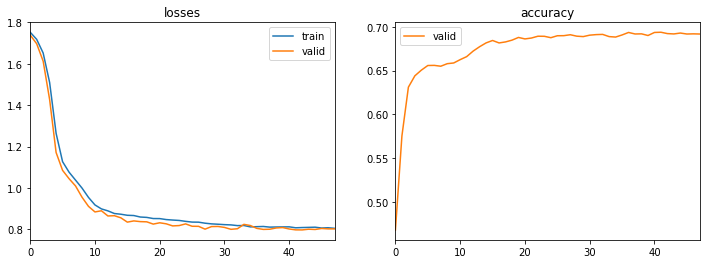

Trying params:                                                                                                         
{'batch_size': 512, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
GRU                                                                                                                    
 87%|███████████████████████████████████████      | 26/30 [2:06:57<16:50, 252.62s/trial, best loss: 0.8020673990249634]

epoch,train_loss,valid_loss,accuracy,time
0,1.698704,1.679197,0.636021,00:05
1,1.611772,1.580570,0.660393,00:05
2,1.413397,1.348868,0.664061,00:05
3,1.158440,1.117458,0.661599,00:06
4,1.078633,1.057288,0.652526,00:06
5,1.025214,1.000210,0.654409,00:05
6,0.978413,0.931938,0.658414,00:06
7,0.921765,0.892151,0.667632,00:06
8,0.897678,0.878063,0.667439,00:06
9,0.888636,0.870210,0.673327,00:06


Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.01, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
Trying params:                                                                                                         
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}
100%|█████████████████████████████████████████████| 30/30 [2

In [ ]:
trials = Trials()
best = fmin(create_model_hypopt,
    space=search_space,
    algo=tpe.suggest,
    max_evals=30,  # test trials
    trials=trials)

In [ ]:
print(best)

{'bidirectional': 0, 'bs': 2, 'epochs': 1, 'hidden_size': 0, 'lr': 3, 'n_layers': 2, 'optimizer': 2, 'patience': 0, 'ts': 2}


In [ ]:
from hyperopt import space_eval

In [ ]:
print("Best parameters:")
print(space_eval(search_space, best))

Best parameters:
{'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x00000243C597C1F8>, 'patience': 5, 'time_steps': 90}


In [ ]:
best_parameters = space_eval(search_space, best)

In [ ]:
def build_model(params):
    # clear memory 
    gc.collect()
    print("Trying params:",params)
    batch_size = params["batch_size"]
    time_steps = params["time_steps"]
    
    # Create data loader
    tfms  = [None, [Categorize()]]
    dsets = TSDatasets(X[:, :, -time_steps:], y, tfms=tfms, splits=splits, inplace=True)
    # set num_workers for memory bottleneck
    dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[batch_size, batch_size], num_workers=0)
    
    # Create model
    arch = GRU
    k = {
        'n_layers': params['n_layers'],
        'hidden_size': params['hidden_size'],
        'bidirectional': params['bidirectional']
    }
    model = create_model(arch, dls=dls, **k)
    print(model.__class__.__name__)
    
    # Training the model
    learn = Learner(dls, model, metrics=accuracy, opt_func=params['optimizer'])
    start = time.time()
    learn.fit_one_cycle(params['epochs'], lr_max=params['lr'],
                        cbs=EarlyStoppingCallback(monitor='valid_loss', min_delta=0.0, patience=params['patience']))
    learn.plot_metrics()
    elapsed = time.time() - start
    
    # delete tmp variables
    del dls
    del model
    return learn

Trying params: {'batch_size': 1024, 'bidirectional': True, 'epochs': 50, 'hidden_size': 50, 'lr': 0.0001, 'n_layers': 3, 'optimizer': <function RMSProp at 0x000001A51FCCE318>, 'patience': 5, 'time_steps': 90}
GRU


epoch,train_loss,valid_loss,accuracy,time
0,1.805418,1.792700,0.131750,00:05
1,1.755596,1.730118,0.396072,00:04
2,1.664467,1.610017,0.652430,00:04
3,1.479559,1.370168,0.661985,00:04
4,1.228656,1.133483,0.661310,00:04
5,1.107570,1.072591,0.656822,00:04
6,1.066532,1.037691,0.654264,00:05
7,1.034262,0.994628,0.657449,00:04
8,0.988524,0.948527,0.659235,00:05
9,0.939266,0.904356,0.662275,00:04


No improvement since epoch 22: early stopping


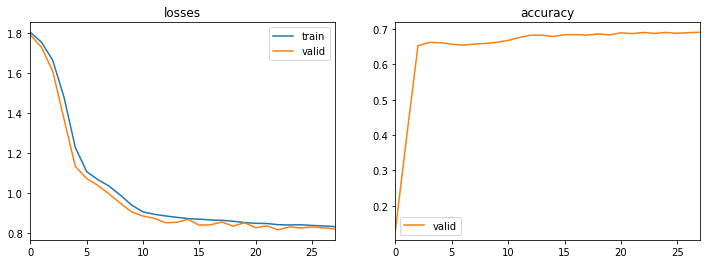

In [ ]:
learn = build_model(best_parameters)

In [ ]:
dls = learn.dls
valid_dl = dls.valid

In [ ]:
time_steps = best_parameters["time_steps"]
X_test_tmp = X_test[:, :, -time_steps:]

In [ ]:
test_ds = valid_dl.dataset.add_test(X_test_tmp, y_test)  # use the test data
test_dl = valid_dl.new(test_ds)
print(test_dl.n)

102430


In [ ]:
test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
test_probas, test_targets, test_preds

(tensor([[4.4751e-01, 3.3324e-01, 1.4746e-01, 5.8086e-02, 1.2386e-02, 1.3107e-03],
         [8.4468e-01, 1.0937e-01, 3.7645e-02, 7.0500e-03, 1.0486e-03, 1.9817e-04],
         [9.5764e-01, 3.2466e-02, 7.8694e-03, 1.6120e-03, 3.3850e-04, 7.2105e-05],
         ...,
         [9.8279e-01, 1.2364e-02, 3.6044e-03, 1.0384e-03, 1.7298e-04, 3.2115e-05],
         [9.6568e-01, 2.2133e-02, 8.3562e-03, 3.1892e-03, 5.4394e-04, 9.8954e-05],
         [9.4168e-01, 4.7181e-02, 8.8718e-03, 1.9471e-03, 2.6998e-04, 5.0034e-05]]),
 TensorCategory([1, 0, 0,  ..., 0, 0, 0], dtype=torch.int32),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [ ]:
print(f'accuracy: {skm.accuracy_score(test_targets, test_preds):10.6f}')
print(f'f1 score: {skm.f1_score(test_targets, test_preds, average="weighted"):10.6f}')

accuracy:   0.732666
f1 score:   0.698858



if you want to Save the true and predicted results:

In [ ]:
y_test_true = test_targets.numpy()
y_test_pred = test_preds.numpy()

In [ ]:
np.save('y_true_LSTM', y_test_true)
np.save('y_pred_LSTM', y_test_pred)